In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

export_dir = '/home/pgonzalez/Dropbox/quant_datasetshift/'
quantificators = ["CC", "ACC", "PCC","PCCW", "PACC", "HDy","DyS","SMM", "SLD", "MLPE"]
#quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "SLD", "MLPE"]
error = "MAE"
ps_train = [0.25, 0.5, 0.75]
ps_test = [0.25, 0.5, 0.75]
dateexperiment = "2022_07_26_03_26"

results_dict={}
print("Loading results... ",sep="")
for quant_name in quantificators:
    results_dict[quant_name] = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results_dict[quant_name]['covariate_measure'] = results_dict[quant_name]['domainA_prop_train']-results_dict[quant_name]['domainA_prop_test']
    results_dict[quant_name]['covariate_measure'] = results_dict[quant_name]['covariate_measure'].round(1)
print("Done")


mean_error_methods = {}

writer = pd.ExcelWriter('results/covariate/excel/errors_%s.xlsx' % dateexperiment, engine='xlsxwriter')
for p_train in ps_train:
    for p_test in ps_test:
        for quant_name in quantificators:
            exp_id = "%s_%f_%f" % (quant_name,p_train,p_test)
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
            #convert to matrix form
            results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
            results_mean.columns = results_mean.columns.map(lambda x: "%.1f" % float(x))
            results_mean.columns.name="domA prop test"
            results_mean.index.name="domA prop train"
            mean_error_methods[exp_id]=results_mean.mean().mean()
            print("Results for method %s. p_train: %f. p_test: %f. %s: %f" % (quant_name,p_train, p_test,error,mean_error_methods[exp_id]))
            cm = sns.light_palette('red', as_cmap=True)
            display(results_mean.style.format_index('{:.1f}').format('{:.3f}').background_gradient(cmap=cm,low=0,high=1))
            results_mean.to_excel(writer, sheet_name=exp_id)
            workbook = writer.book
            worksheet = writer.sheets[exp_id]
            # Apply a conditional format to the cell range.
            worksheet.conditional_format('B2:L12', {'type': '2_color_scale','min_type':'num','max_type':'num','min_value':'0','max_value':'1','min_color':'#f3f0f0','max_color':'#ff0000'})
writer.save()


Loading results... 
Done
Results for method CC. p_train: 0.250000. p_test: 0.250000. MAE: 0.023733


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.015,0.016,0.018,0.022,0.027,0.032,0.040,0.048,0.055,0.059
0.1,0.024,0.023,0.019,0.020,0.019,0.019,0.017,0.016,0.016,0.015,0.016
0.2,0.026,0.027,0.024,0.026,0.026,0.027,0.026,0.024,0.022,0.021,0.023
0.3,0.023,0.024,0.021,0.023,0.024,0.025,0.025,0.024,0.023,0.022,0.025
0.4,0.025,0.027,0.023,0.027,0.027,0.028,0.028,0.027,0.026,0.024,0.028
0.5,0.021,0.022,0.020,0.022,0.022,0.023,0.023,0.021,0.021,0.019,0.022
0.6,0.016,0.017,0.016,0.017,0.017,0.019,0.019,0.018,0.018,0.018,0.020
0.7,0.021,0.021,0.020,0.021,0.022,0.024,0.025,0.024,0.024,0.024,0.026
0.8,0.022,0.021,0.021,0.021,0.019,0.020,0.019,0.018,0.018,0.017,0.018


Results for method ACC. p_train: 0.250000. p_test: 0.250000. MAE: 0.025182


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.021,0.018,0.020,0.023,0.030,0.037,0.045,0.056,0.066,0.077,0.083
0.1,0.020,0.019,0.019,0.018,0.020,0.021,0.021,0.023,0.027,0.029,0.029
0.2,0.024,0.025,0.022,0.021,0.022,0.023,0.021,0.020,0.021,0.018,0.020
0.3,0.022,0.022,0.020,0.021,0.023,0.023,0.023,0.022,0.023,0.021,0.024
0.4,0.021,0.020,0.019,0.021,0.021,0.022,0.021,0.021,0.022,0.019,0.022
0.5,0.023,0.022,0.020,0.021,0.022,0.024,0.023,0.022,0.022,0.019,0.022
0.6,0.020,0.020,0.019,0.020,0.020,0.022,0.021,0.022,0.021,0.020,0.024
0.7,0.020,0.019,0.020,0.019,0.020,0.023,0.023,0.023,0.022,0.021,0.023
0.8,0.024,0.022,0.020,0.021,0.019,0.020,0.019,0.020,0.019,0.018,0.021


Results for method PCC. p_train: 0.250000. p_test: 0.250000. MAE: 0.014872


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.011,0.011,0.011,0.012,0.015,0.018,0.022,0.027,0.032,0.037,0.040
0.1,0.011,0.011,0.010,0.010,0.010,0.010,0.010,0.010,0.011,0.011,0.011
0.2,0.011,0.012,0.010,0.011,0.011,0.012,0.012,0.011,0.011,0.010,0.012
0.3,0.012,0.012,0.011,0.011,0.012,0.013,0.014,0.013,0.013,0.013,0.015
0.4,0.013,0.013,0.011,0.012,0.013,0.014,0.013,0.013,0.012,0.011,0.013
0.5,0.014,0.015,0.012,0.012,0.013,0.014,0.013,0.012,0.012,0.010,0.013
0.6,0.011,0.013,0.011,0.012,0.012,0.013,0.013,0.013,0.012,0.012,0.015
0.7,0.013,0.013,0.012,0.013,0.013,0.014,0.014,0.014,0.013,0.013,0.014
0.8,0.012,0.012,0.010,0.012,0.011,0.013,0.013,0.012,0.012,0.011,0.014


Results for method PCCW. p_train: 0.250000. p_test: 0.250000. MAE: 0.024582


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.015,0.018,0.029,0.036,0.044,0.055,0.067,0.083,0.095,0.113,0.128
0.1,0.014,0.015,0.020,0.021,0.024,0.028,0.033,0.042,0.048,0.058,0.061
0.2,0.013,0.014,0.016,0.014,0.015,0.016,0.017,0.021,0.023,0.026,0.023
0.3,0.014,0.014,0.016,0.013,0.013,0.013,0.013,0.016,0.018,0.019,0.016
0.4,0.015,0.014,0.016,0.013,0.013,0.013,0.013,0.015,0.015,0.016,0.014
0.5,0.016,0.016,0.017,0.014,0.013,0.013,0.012,0.014,0.014,0.015,0.013
0.6,0.025,0.023,0.025,0.019,0.015,0.015,0.013,0.015,0.014,0.014,0.012
0.7,0.024,0.021,0.023,0.017,0.014,0.014,0.013,0.015,0.014,0.013,0.014
0.8,0.032,0.028,0.028,0.022,0.017,0.016,0.015,0.015,0.014,0.014,0.012


Results for method PACC. p_train: 0.250000. p_test: 0.250000. MAE: 0.021943


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.016,0.020,0.023,0.027,0.033,0.039,0.049,0.056,0.064,0.067
0.1,0.016,0.016,0.016,0.015,0.016,0.016,0.016,0.019,0.021,0.022,0.022
0.2,0.018,0.019,0.017,0.017,0.017,0.018,0.018,0.017,0.017,0.016,0.018
0.3,0.020,0.020,0.019,0.018,0.020,0.020,0.020,0.020,0.021,0.020,0.022
0.4,0.019,0.019,0.018,0.016,0.018,0.017,0.017,0.018,0.018,0.016,0.017
0.5,0.020,0.020,0.018,0.017,0.018,0.018,0.017,0.017,0.017,0.015,0.017
0.6,0.017,0.018,0.017,0.017,0.016,0.017,0.017,0.018,0.016,0.016,0.017
0.7,0.019,0.018,0.018,0.016,0.016,0.017,0.017,0.019,0.018,0.018,0.020
0.8,0.017,0.017,0.016,0.016,0.015,0.015,0.015,0.016,0.016,0.016,0.018


Results for method HDy. p_train: 0.250000. p_test: 0.250000. MAE: 0.040014


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.026,0.044,0.056,0.069,0.085,0.102,0.122,0.138,0.163,0.183
0.1,0.019,0.019,0.029,0.032,0.043,0.051,0.062,0.076,0.086,0.105,0.114
0.2,0.023,0.019,0.023,0.023,0.027,0.034,0.041,0.052,0.059,0.073,0.075
0.3,0.024,0.021,0.023,0.021,0.022,0.024,0.028,0.035,0.039,0.046,0.047
0.4,0.023,0.022,0.023,0.021,0.020,0.021,0.020,0.022,0.023,0.024,0.024
0.5,0.046,0.038,0.034,0.028,0.022,0.022,0.020,0.023,0.026,0.030,0.035
0.6,0.051,0.042,0.037,0.028,0.020,0.020,0.017,0.019,0.021,0.024,0.028
0.7,0.050,0.042,0.040,0.031,0.026,0.025,0.021,0.022,0.020,0.021,0.025
0.8,0.081,0.065,0.057,0.047,0.037,0.032,0.026,0.026,0.022,0.023,0.027


Results for method DyS. p_train: 0.250000. p_test: 0.250000. MAE: 0.027985


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.018,0.028,0.037,0.045,0.056,0.068,0.084,0.097,0.113,0.127
0.1,0.017,0.016,0.020,0.020,0.023,0.025,0.028,0.036,0.040,0.048,0.049
0.2,0.018,0.018,0.022,0.021,0.021,0.022,0.024,0.028,0.030,0.035,0.035
0.3,0.019,0.018,0.019,0.016,0.016,0.017,0.016,0.018,0.018,0.020,0.018
0.4,0.022,0.020,0.020,0.018,0.017,0.017,0.017,0.018,0.018,0.018,0.018
0.5,0.024,0.022,0.020,0.019,0.018,0.020,0.019,0.020,0.020,0.019,0.021
0.6,0.022,0.020,0.021,0.018,0.016,0.018,0.018,0.019,0.018,0.018,0.022
0.7,0.026,0.023,0.024,0.020,0.019,0.018,0.019,0.020,0.019,0.018,0.021
0.8,0.034,0.029,0.029,0.025,0.021,0.020,0.018,0.019,0.017,0.017,0.017


Results for method SMM. p_train: 0.250000. p_test: 0.250000. MAE: 0.023882


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.016,0.022,0.029,0.035,0.046,0.054,0.067,0.076,0.087,0.094
0.1,0.017,0.017,0.017,0.016,0.017,0.018,0.020,0.024,0.027,0.031,0.031
0.2,0.018,0.018,0.017,0.016,0.017,0.018,0.017,0.019,0.020,0.022,0.021
0.3,0.018,0.018,0.018,0.017,0.017,0.018,0.017,0.019,0.020,0.019,0.019
0.4,0.021,0.020,0.020,0.018,0.018,0.019,0.018,0.019,0.019,0.018,0.018
0.5,0.019,0.020,0.018,0.018,0.017,0.017,0.016,0.018,0.019,0.019,0.018
0.6,0.018,0.018,0.018,0.017,0.015,0.017,0.017,0.019,0.017,0.017,0.021
0.7,0.024,0.022,0.023,0.020,0.019,0.019,0.018,0.019,0.018,0.019,0.019
0.8,0.024,0.024,0.023,0.021,0.019,0.018,0.018,0.019,0.018,0.017,0.019


Results for method SLD. p_train: 0.250000. p_test: 0.250000. MAE: 0.024573


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.015,0.016,0.024,0.031,0.037,0.048,0.059,0.075,0.086,0.103,0.115
0.1,0.015,0.014,0.017,0.017,0.019,0.021,0.025,0.033,0.038,0.047,0.047
0.2,0.015,0.015,0.016,0.014,0.015,0.015,0.015,0.017,0.019,0.021,0.018
0.3,0.016,0.016,0.016,0.014,0.015,0.015,0.015,0.016,0.016,0.017,0.016
0.4,0.017,0.017,0.017,0.015,0.015,0.016,0.015,0.016,0.016,0.015,0.016
0.5,0.017,0.017,0.017,0.015,0.014,0.016,0.015,0.015,0.015,0.014,0.015
0.6,0.019,0.018,0.020,0.017,0.014,0.015,0.015,0.016,0.015,0.014,0.017
0.7,0.020,0.018,0.020,0.016,0.015,0.016,0.016,0.017,0.016,0.015,0.018
0.8,0.024,0.023,0.022,0.019,0.016,0.016,0.015,0.016,0.014,0.014,0.015


Results for method MLPE. p_train: 0.250000. p_test: 0.250000. MAE: 0.000596


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.1,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.2,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.3,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.4,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.5,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.6,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.7,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.8,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000


Results for method CC. p_train: 0.250000. p_test: 0.500000. MAE: 0.074353


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.066,0.077,0.091,0.106,0.121,0.133,0.144,0.161,0.173,0.186,0.200
0.1,0.053,0.056,0.062,0.068,0.074,0.077,0.079,0.088,0.094,0.098,0.104
0.2,0.049,0.050,0.052,0.055,0.056,0.059,0.057,0.063,0.065,0.067,0.069
0.3,0.056,0.057,0.058,0.060,0.059,0.060,0.057,0.061,0.062,0.062,0.063
0.4,0.054,0.053,0.053,0.056,0.054,0.055,0.051,0.053,0.053,0.054,0.054
0.5,0.065,0.065,0.063,0.065,0.064,0.064,0.059,0.061,0.060,0.061,0.060
0.6,0.079,0.076,0.073,0.073,0.070,0.069,0.063,0.063,0.060,0.061,0.058
0.7,0.082,0.076,0.074,0.073,0.068,0.066,0.059,0.059,0.055,0.052,0.050
0.8,0.099,0.094,0.091,0.089,0.083,0.080,0.072,0.071,0.065,0.064,0.060


Results for method ACC. p_train: 0.250000. p_test: 0.500000. MAE: 0.034619


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.025,0.021,0.026,0.043,0.064,0.081,0.095,0.118,0.137,0.155,0.175
0.1,0.026,0.025,0.021,0.024,0.028,0.030,0.033,0.041,0.049,0.052,0.059
0.2,0.034,0.033,0.028,0.026,0.024,0.023,0.023,0.021,0.023,0.023,0.021
0.3,0.027,0.027,0.024,0.024,0.025,0.024,0.026,0.024,0.024,0.022,0.022
0.4,0.025,0.024,0.023,0.024,0.024,0.024,0.027,0.026,0.025,0.025,0.024
0.5,0.025,0.024,0.025,0.024,0.025,0.024,0.030,0.028,0.029,0.027,0.027
0.6,0.023,0.022,0.020,0.021,0.023,0.023,0.027,0.028,0.029,0.029,0.031
0.7,0.025,0.023,0.020,0.022,0.021,0.022,0.027,0.028,0.030,0.032,0.032
0.8,0.038,0.032,0.028,0.025,0.022,0.020,0.023,0.024,0.025,0.026,0.030


Results for method PCC. p_train: 0.250000. p_test: 0.500000. MAE: 0.103930


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.088,0.097,0.108,0.120,0.132,0.142,0.150,0.164,0.174,0.185,0.195
0.1,0.089,0.092,0.096,0.103,0.106,0.110,0.111,0.118,0.122,0.126,0.131
0.2,0.090,0.091,0.093,0.096,0.097,0.099,0.098,0.103,0.103,0.107,0.107
0.3,0.092,0.092,0.093,0.095,0.094,0.095,0.092,0.095,0.096,0.096,0.097
0.4,0.094,0.093,0.093,0.095,0.094,0.094,0.091,0.093,0.092,0.093,0.092
0.5,0.095,0.094,0.093,0.096,0.093,0.093,0.089,0.092,0.090,0.092,0.090
0.6,0.104,0.101,0.099,0.100,0.097,0.095,0.090,0.091,0.088,0.087,0.084
0.7,0.122,0.118,0.115,0.115,0.110,0.108,0.102,0.102,0.098,0.097,0.093
0.8,0.119,0.114,0.111,0.109,0.104,0.101,0.094,0.093,0.087,0.086,0.081


Results for method PCCW. p_train: 0.250000. p_test: 0.500000. MAE: 0.040665


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.029,0.040,0.054,0.072,0.089,0.106,0.120,0.143,0.164,0.186,0.211
0.1,0.028,0.031,0.036,0.045,0.053,0.059,0.062,0.074,0.083,0.091,0.102
0.2,0.026,0.027,0.028,0.032,0.035,0.036,0.035,0.041,0.044,0.048,0.050
0.3,0.023,0.024,0.024,0.027,0.028,0.029,0.027,0.032,0.035,0.036,0.038
0.4,0.024,0.024,0.023,0.026,0.026,0.026,0.024,0.026,0.028,0.030,0.029
0.5,0.027,0.027,0.025,0.028,0.027,0.026,0.023,0.026,0.026,0.028,0.027
0.6,0.040,0.038,0.033,0.034,0.032,0.029,0.024,0.026,0.024,0.025,0.022
0.7,0.037,0.036,0.031,0.031,0.028,0.025,0.021,0.022,0.020,0.020,0.017
0.8,0.047,0.044,0.039,0.038,0.034,0.031,0.025,0.026,0.023,0.024,0.020


Results for method PACC. p_train: 0.250000. p_test: 0.500000. MAE: 0.032606


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.022,0.018,0.024,0.040,0.057,0.074,0.087,0.109,0.125,0.143,0.160
0.1,0.026,0.021,0.018,0.018,0.020,0.022,0.025,0.033,0.039,0.046,0.052
0.2,0.033,0.030,0.027,0.024,0.021,0.021,0.022,0.018,0.019,0.020,0.019
0.3,0.031,0.029,0.028,0.026,0.027,0.025,0.029,0.025,0.025,0.025,0.025
0.4,0.026,0.025,0.025,0.023,0.024,0.024,0.028,0.026,0.026,0.024,0.026
0.5,0.023,0.024,0.023,0.023,0.024,0.024,0.029,0.027,0.029,0.027,0.029
0.6,0.020,0.019,0.018,0.019,0.020,0.021,0.026,0.026,0.028,0.029,0.033
0.7,0.024,0.021,0.018,0.019,0.018,0.019,0.026,0.026,0.030,0.031,0.037
0.8,0.040,0.033,0.026,0.025,0.020,0.017,0.019,0.020,0.023,0.025,0.032


Results for method HDy. p_train: 0.250000. p_test: 0.500000. MAE: 0.051935


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.026,0.035,0.055,0.079,0.106,0.130,0.153,0.187,0.219,0.254,0.299
0.1,0.024,0.025,0.031,0.046,0.065,0.076,0.090,0.114,0.131,0.149,0.171
0.2,0.026,0.021,0.020,0.027,0.036,0.045,0.052,0.070,0.081,0.093,0.105
0.3,0.033,0.028,0.024,0.025,0.026,0.027,0.030,0.039,0.046,0.051,0.057
0.4,0.028,0.025,0.024,0.024,0.024,0.023,0.024,0.026,0.026,0.028,0.027
0.5,0.048,0.039,0.032,0.028,0.023,0.022,0.023,0.028,0.029,0.034,0.038
0.6,0.060,0.047,0.038,0.032,0.025,0.021,0.019,0.022,0.022,0.026,0.030
0.7,0.060,0.051,0.041,0.037,0.031,0.025,0.023,0.024,0.022,0.026,0.029
0.8,0.102,0.081,0.066,0.055,0.048,0.038,0.032,0.029,0.024,0.025,0.027


Results for method DyS. p_train: 0.250000. p_test: 0.500000. MAE: 0.037655


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.025,0.039,0.059,0.078,0.098,0.115,0.142,0.166,0.192,0.221
0.1,0.021,0.020,0.022,0.028,0.036,0.040,0.045,0.057,0.065,0.073,0.084
0.2,0.021,0.021,0.021,0.024,0.026,0.030,0.032,0.038,0.041,0.046,0.051
0.3,0.021,0.018,0.017,0.020,0.019,0.019,0.019,0.022,0.022,0.024,0.025
0.4,0.025,0.022,0.020,0.021,0.020,0.020,0.020,0.020,0.019,0.019,0.019
0.5,0.028,0.025,0.023,0.023,0.021,0.021,0.022,0.023,0.022,0.023,0.024
0.6,0.027,0.025,0.022,0.022,0.022,0.021,0.022,0.023,0.021,0.022,0.022
0.7,0.035,0.031,0.027,0.026,0.023,0.022,0.023,0.023,0.020,0.022,0.021
0.8,0.050,0.044,0.037,0.034,0.028,0.025,0.022,0.022,0.019,0.020,0.020


Results for method SMM. p_train: 0.250000. p_test: 0.500000. MAE: 0.039340


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.023,0.022,0.035,0.058,0.079,0.100,0.116,0.140,0.160,0.181,0.201
0.1,0.026,0.020,0.018,0.023,0.029,0.034,0.041,0.053,0.062,0.071,0.080
0.2,0.026,0.023,0.020,0.022,0.020,0.021,0.025,0.027,0.030,0.035,0.037
0.3,0.025,0.024,0.023,0.025,0.023,0.022,0.025,0.025,0.024,0.025,0.024
0.4,0.029,0.028,0.025,0.026,0.023,0.023,0.026,0.024,0.023,0.023,0.022
0.5,0.023,0.021,0.020,0.022,0.020,0.018,0.021,0.020,0.020,0.020,0.020
0.6,0.033,0.028,0.024,0.024,0.019,0.019,0.021,0.023,0.022,0.025,0.029
0.7,0.043,0.036,0.032,0.031,0.026,0.024,0.024,0.024,0.024,0.024,0.028
0.8,0.068,0.058,0.050,0.043,0.035,0.029,0.026,0.024,0.023,0.025,0.031


Results for method SLD. p_train: 0.250000. p_test: 0.500000. MAE: 0.028891


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.018,0.024,0.039,0.055,0.072,0.085,0.108,0.128,0.150,0.174
0.1,0.018,0.015,0.015,0.019,0.023,0.027,0.030,0.039,0.048,0.055,0.064
0.2,0.018,0.016,0.015,0.016,0.017,0.017,0.018,0.018,0.020,0.023,0.023
0.3,0.021,0.018,0.017,0.018,0.018,0.017,0.018,0.019,0.018,0.018,0.017
0.4,0.021,0.019,0.018,0.018,0.019,0.017,0.019,0.019,0.017,0.017,0.015
0.5,0.022,0.019,0.018,0.018,0.019,0.017,0.018,0.018,0.016,0.016,0.014
0.6,0.022,0.020,0.018,0.018,0.019,0.018,0.020,0.020,0.018,0.017,0.016
0.7,0.020,0.019,0.017,0.018,0.019,0.019,0.021,0.022,0.020,0.020,0.019
0.8,0.027,0.023,0.021,0.020,0.019,0.019,0.019,0.019,0.017,0.015,0.015


Results for method MLPE. p_train: 0.250000. p_test: 0.500000. MAE: 0.250000


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.1,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.2,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.3,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.4,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.5,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.6,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.7,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.8,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250


Results for method CC. p_train: 0.250000. p_test: 0.750000. MAE: 0.162138


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.140,0.157,0.180,0.202,0.222,0.241,0.257,0.279,0.302,0.321,0.340
0.1,0.125,0.131,0.142,0.150,0.159,0.165,0.170,0.181,0.192,0.202,0.208
0.2,0.120,0.122,0.129,0.133,0.137,0.139,0.140,0.147,0.153,0.160,0.161
0.3,0.131,0.131,0.137,0.137,0.139,0.139,0.137,0.142,0.145,0.151,0.149
0.4,0.131,0.129,0.134,0.133,0.133,0.131,0.128,0.132,0.132,0.137,0.134
0.5,0.148,0.146,0.147,0.146,0.144,0.143,0.138,0.140,0.139,0.142,0.137
0.6,0.166,0.160,0.161,0.157,0.152,0.149,0.142,0.143,0.139,0.140,0.133
0.7,0.175,0.168,0.167,0.161,0.154,0.148,0.140,0.138,0.133,0.131,0.123
0.8,0.201,0.193,0.188,0.182,0.174,0.166,0.157,0.153,0.146,0.143,0.132


Results for method ACC. p_train: 0.250000. p_test: 0.750000. MAE: 0.047785


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.029,0.023,0.042,0.069,0.098,0.124,0.148,0.178,0.212,0.239,0.267
0.1,0.033,0.028,0.028,0.029,0.038,0.042,0.049,0.061,0.076,0.087,0.096
0.2,0.044,0.042,0.035,0.029,0.027,0.027,0.026,0.024,0.029,0.033,0.032
0.3,0.034,0.033,0.029,0.028,0.027,0.027,0.029,0.025,0.027,0.025,0.025
0.4,0.030,0.029,0.028,0.029,0.028,0.029,0.031,0.031,0.029,0.028,0.029
0.5,0.028,0.028,0.029,0.027,0.029,0.030,0.034,0.034,0.034,0.031,0.035
0.6,0.026,0.022,0.024,0.024,0.025,0.026,0.031,0.033,0.036,0.035,0.043
0.7,0.035,0.029,0.030,0.027,0.025,0.026,0.032,0.033,0.038,0.037,0.046
0.8,0.061,0.049,0.043,0.036,0.028,0.023,0.025,0.026,0.030,0.032,0.045


Results for method PCC. p_train: 0.250000. p_test: 0.750000. MAE: 0.215586


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.184,0.198,0.217,0.236,0.251,0.268,0.281,0.300,0.319,0.336,0.351
0.1,0.185,0.191,0.200,0.209,0.214,0.220,0.224,0.235,0.243,0.252,0.257
0.2,0.189,0.190,0.195,0.201,0.203,0.204,0.206,0.212,0.216,0.222,0.222
0.3,0.192,0.192,0.195,0.198,0.197,0.198,0.196,0.200,0.202,0.206,0.205
0.4,0.197,0.195,0.198,0.199,0.197,0.196,0.193,0.195,0.197,0.199,0.195
0.5,0.202,0.199,0.200,0.200,0.197,0.195,0.191,0.193,0.192,0.194,0.189
0.6,0.216,0.210,0.210,0.207,0.202,0.198,0.191,0.191,0.188,0.187,0.180
0.7,0.249,0.243,0.240,0.235,0.228,0.222,0.215,0.212,0.207,0.205,0.197
0.8,0.244,0.236,0.231,0.225,0.216,0.209,0.199,0.195,0.188,0.184,0.173


Results for method PCCW. p_train: 0.250000. p_test: 0.750000. MAE: 0.049374


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.035,0.049,0.071,0.093,0.115,0.138,0.155,0.184,0.219,0.245,0.276
0.1,0.033,0.038,0.048,0.057,0.066,0.072,0.077,0.091,0.106,0.117,0.127
0.2,0.029,0.030,0.034,0.039,0.043,0.044,0.042,0.050,0.058,0.064,0.064
0.3,0.025,0.026,0.029,0.033,0.036,0.036,0.034,0.040,0.046,0.051,0.050
0.4,0.025,0.024,0.027,0.029,0.031,0.029,0.027,0.032,0.036,0.039,0.036
0.5,0.029,0.029,0.031,0.032,0.034,0.032,0.029,0.034,0.037,0.040,0.035
0.6,0.039,0.036,0.038,0.037,0.037,0.033,0.030,0.032,0.034,0.038,0.030
0.7,0.035,0.034,0.033,0.032,0.031,0.027,0.025,0.027,0.027,0.029,0.022
0.8,0.048,0.045,0.042,0.040,0.038,0.033,0.029,0.029,0.030,0.032,0.024


Results for method PACC. p_train: 0.250000. p_test: 0.750000. MAE: 0.049663


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.028,0.019,0.035,0.063,0.088,0.115,0.137,0.169,0.201,0.227,0.253
0.1,0.038,0.030,0.023,0.021,0.025,0.030,0.037,0.051,0.067,0.080,0.090
0.2,0.047,0.046,0.038,0.030,0.027,0.026,0.027,0.022,0.026,0.028,0.029
0.3,0.044,0.045,0.039,0.036,0.036,0.036,0.039,0.033,0.031,0.028,0.028
0.4,0.034,0.037,0.034,0.034,0.035,0.038,0.042,0.040,0.037,0.035,0.039
0.5,0.026,0.029,0.029,0.029,0.033,0.036,0.043,0.042,0.042,0.041,0.048
0.6,0.024,0.021,0.022,0.023,0.025,0.029,0.038,0.039,0.044,0.045,0.058
0.7,0.039,0.029,0.028,0.023,0.022,0.025,0.035,0.038,0.046,0.050,0.065
0.8,0.078,0.063,0.053,0.042,0.029,0.022,0.023,0.024,0.032,0.037,0.056


Results for method HDy. p_train: 0.250000. p_test: 0.750000. MAE: 0.058996


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.026,0.036,0.061,0.090,0.120,0.151,0.180,0.220,0.269,0.313,0.370
0.1,0.026,0.024,0.036,0.053,0.075,0.092,0.109,0.132,0.162,0.186,0.207
0.2,0.028,0.021,0.023,0.030,0.039,0.049,0.057,0.073,0.093,0.109,0.119
0.3,0.036,0.032,0.028,0.027,0.027,0.028,0.030,0.037,0.048,0.056,0.060
0.4,0.027,0.024,0.026,0.025,0.026,0.025,0.026,0.027,0.028,0.031,0.030
0.5,0.042,0.035,0.031,0.027,0.025,0.024,0.026,0.029,0.029,0.034,0.038
0.6,0.057,0.044,0.037,0.029,0.025,0.021,0.021,0.021,0.022,0.027,0.029
0.7,0.066,0.054,0.046,0.040,0.032,0.025,0.026,0.025,0.023,0.028,0.033
0.8,0.104,0.082,0.069,0.058,0.049,0.040,0.036,0.031,0.027,0.027,0.027


Results for method DyS. p_train: 0.250000. p_test: 0.750000. MAE: 0.044931


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.027,0.052,0.077,0.101,0.126,0.148,0.182,0.220,0.253,0.290
0.1,0.023,0.021,0.027,0.033,0.043,0.049,0.055,0.068,0.084,0.096,0.106
0.2,0.022,0.020,0.024,0.027,0.030,0.033,0.035,0.043,0.052,0.060,0.062
0.3,0.019,0.018,0.020,0.020,0.021,0.021,0.021,0.024,0.027,0.032,0.032
0.4,0.026,0.023,0.024,0.022,0.022,0.021,0.021,0.021,0.024,0.026,0.023
0.5,0.030,0.026,0.026,0.025,0.024,0.022,0.024,0.025,0.024,0.026,0.027
0.6,0.030,0.026,0.027,0.026,0.025,0.024,0.024,0.024,0.023,0.023,0.024
0.7,0.037,0.032,0.032,0.028,0.026,0.024,0.024,0.023,0.023,0.022,0.022
0.8,0.066,0.056,0.050,0.043,0.035,0.029,0.025,0.023,0.022,0.021,0.023


Results for method SMM. p_train: 0.250000. p_test: 0.750000. MAE: 0.060731


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.025,0.029,0.058,0.092,0.123,0.154,0.180,0.215,0.251,0.282,0.311
0.1,0.032,0.024,0.024,0.031,0.044,0.055,0.067,0.086,0.105,0.123,0.135
0.2,0.032,0.029,0.027,0.027,0.027,0.029,0.033,0.041,0.050,0.060,0.062
0.3,0.032,0.031,0.030,0.031,0.030,0.031,0.031,0.031,0.033,0.033,0.031
0.4,0.035,0.035,0.035,0.032,0.030,0.031,0.034,0.032,0.030,0.029,0.029
0.5,0.030,0.025,0.026,0.026,0.023,0.023,0.025,0.025,0.025,0.024,0.027
0.6,0.057,0.044,0.043,0.035,0.027,0.024,0.026,0.026,0.029,0.030,0.042
0.7,0.074,0.061,0.057,0.048,0.038,0.031,0.030,0.029,0.032,0.034,0.044
0.8,0.122,0.103,0.092,0.078,0.058,0.044,0.035,0.030,0.030,0.034,0.049


Results for method SLD. p_train: 0.250000. p_test: 0.750000. MAE: 0.029270


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.017,0.028,0.044,0.062,0.080,0.094,0.121,0.154,0.178,0.207
0.1,0.017,0.014,0.016,0.018,0.024,0.027,0.029,0.039,0.052,0.061,0.068
0.2,0.017,0.016,0.016,0.016,0.017,0.017,0.018,0.018,0.022,0.026,0.025
0.3,0.020,0.020,0.019,0.018,0.018,0.017,0.018,0.017,0.017,0.018,0.017
0.4,0.020,0.020,0.019,0.018,0.018,0.018,0.018,0.017,0.016,0.017,0.014
0.5,0.021,0.021,0.020,0.018,0.019,0.017,0.019,0.017,0.015,0.016,0.014
0.6,0.021,0.022,0.020,0.020,0.020,0.019,0.021,0.018,0.017,0.016,0.015
0.7,0.021,0.021,0.020,0.021,0.021,0.021,0.023,0.020,0.019,0.017,0.018
0.8,0.025,0.023,0.022,0.020,0.020,0.020,0.021,0.018,0.017,0.016,0.016


Results for method MLPE. p_train: 0.250000. p_test: 0.750000. MAE: 0.500447


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.1,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.2,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.3,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.4,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.5,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.6,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.7,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.8,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500


Results for method CC. p_train: 0.500000. p_test: 0.250000. MAE: 0.082863


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.067,0.064,0.056,0.054,0.048,0.045,0.040,0.034,0.032,0.029,0.029
0.1,0.069,0.072,0.067,0.070,0.071,0.074,0.074,0.072,0.071,0.068,0.074
0.2,0.075,0.076,0.073,0.076,0.076,0.079,0.081,0.077,0.077,0.075,0.080
0.3,0.078,0.080,0.077,0.080,0.080,0.081,0.082,0.079,0.079,0.077,0.080
0.4,0.082,0.082,0.078,0.082,0.080,0.080,0.080,0.077,0.075,0.072,0.074
0.5,0.081,0.080,0.076,0.079,0.078,0.079,0.079,0.075,0.074,0.071,0.075
0.6,0.088,0.087,0.083,0.085,0.085,0.085,0.084,0.081,0.080,0.076,0.079
0.7,0.094,0.092,0.088,0.088,0.088,0.087,0.086,0.082,0.083,0.078,0.078
0.8,0.103,0.099,0.095,0.095,0.092,0.090,0.088,0.082,0.080,0.073,0.074


Results for method ACC. p_train: 0.500000. p_test: 0.250000. MAE: 0.029469


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.019,0.025,0.027,0.034,0.038,0.044,0.053,0.060,0.067,0.069
0.1,0.019,0.017,0.018,0.017,0.020,0.021,0.022,0.022,0.025,0.023,0.025
0.2,0.019,0.018,0.019,0.018,0.019,0.020,0.020,0.019,0.021,0.020,0.019
0.3,0.021,0.019,0.020,0.018,0.020,0.020,0.019,0.020,0.020,0.020,0.020
0.4,0.021,0.019,0.019,0.017,0.019,0.019,0.016,0.018,0.018,0.019,0.016
0.5,0.022,0.020,0.018,0.019,0.020,0.019,0.018,0.019,0.018,0.017,0.016
0.6,0.023,0.021,0.020,0.020,0.019,0.020,0.018,0.019,0.018,0.018,0.016
0.7,0.026,0.023,0.020,0.020,0.021,0.022,0.019,0.020,0.019,0.019,0.017
0.8,0.038,0.034,0.029,0.027,0.025,0.023,0.022,0.021,0.019,0.021,0.019


Results for method PCC. p_train: 0.500000. p_test: 0.250000. MAE: 0.110346


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.094,0.096,0.092,0.091,0.091,0.091,0.090,0.086,0.085,0.083,0.085
0.1,0.098,0.101,0.100,0.102,0.104,0.107,0.109,0.108,0.108,0.108,0.113
0.2,0.097,0.099,0.098,0.100,0.102,0.105,0.107,0.104,0.105,0.105,0.110
0.3,0.101,0.102,0.101,0.102,0.104,0.106,0.107,0.105,0.105,0.104,0.108
0.4,0.108,0.109,0.106,0.107,0.107,0.108,0.108,0.105,0.104,0.102,0.106
0.5,0.104,0.104,0.100,0.100,0.100,0.101,0.101,0.097,0.095,0.093,0.096
0.6,0.117,0.116,0.113,0.112,0.111,0.112,0.110,0.107,0.105,0.102,0.104
0.7,0.122,0.120,0.116,0.115,0.113,0.113,0.110,0.106,0.104,0.100,0.100
0.8,0.131,0.128,0.123,0.120,0.118,0.115,0.113,0.106,0.103,0.098,0.098


Results for method PCCW. p_train: 0.500000. p_test: 0.250000. MAE: 0.025011


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.015,0.015,0.020,0.027,0.034,0.044,0.056,0.073,0.086,0.105,0.119
0.1,0.016,0.017,0.016,0.014,0.015,0.017,0.017,0.022,0.026,0.032,0.031
0.2,0.016,0.016,0.016,0.014,0.014,0.015,0.014,0.014,0.015,0.016,0.014
0.3,0.018,0.018,0.017,0.016,0.017,0.017,0.017,0.017,0.017,0.017,0.018
0.4,0.019,0.019,0.017,0.017,0.016,0.018,0.017,0.017,0.015,0.013,0.016
0.5,0.017,0.018,0.016,0.016,0.015,0.017,0.016,0.016,0.015,0.013,0.016
0.6,0.017,0.018,0.017,0.017,0.015,0.017,0.017,0.017,0.016,0.014,0.018
0.7,0.021,0.020,0.018,0.018,0.017,0.019,0.018,0.019,0.017,0.015,0.019
0.8,0.024,0.023,0.020,0.019,0.017,0.019,0.019,0.018,0.016,0.015,0.018


Results for method PACC. p_train: 0.500000. p_test: 0.250000. MAE: 0.028286


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.019,0.022,0.023,0.027,0.028,0.030,0.036,0.040,0.043,0.044
0.1,0.020,0.018,0.019,0.016,0.019,0.018,0.018,0.018,0.022,0.020,0.022
0.2,0.021,0.020,0.020,0.017,0.019,0.017,0.016,0.017,0.018,0.017,0.016
0.3,0.020,0.020,0.020,0.017,0.019,0.017,0.017,0.019,0.019,0.019,0.018
0.4,0.019,0.017,0.019,0.016,0.018,0.017,0.016,0.020,0.020,0.022,0.017
0.5,0.019,0.018,0.017,0.017,0.018,0.017,0.016,0.019,0.020,0.021,0.017
0.6,0.018,0.018,0.017,0.017,0.017,0.016,0.016,0.020,0.021,0.024,0.020
0.7,0.026,0.023,0.019,0.017,0.018,0.016,0.015,0.018,0.019,0.023,0.021
0.8,0.043,0.037,0.030,0.026,0.023,0.019,0.017,0.017,0.017,0.022,0.021


Results for method HDy. p_train: 0.500000. p_test: 0.250000. MAE: 0.029774


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.021,0.026,0.031,0.038,0.045,0.053,0.065,0.073,0.087,0.095
0.1,0.017,0.017,0.018,0.020,0.022,0.024,0.025,0.028,0.032,0.034,0.036
0.2,0.019,0.019,0.020,0.019,0.023,0.024,0.027,0.032,0.035,0.039,0.042
0.3,0.020,0.019,0.019,0.017,0.017,0.018,0.018,0.021,0.022,0.023,0.025
0.4,0.028,0.027,0.024,0.023,0.024,0.023,0.023,0.023,0.023,0.022,0.026
0.5,0.027,0.025,0.023,0.022,0.020,0.021,0.019,0.019,0.019,0.017,0.018
0.6,0.026,0.026,0.023,0.021,0.020,0.019,0.019,0.020,0.019,0.017,0.020
0.7,0.026,0.025,0.023,0.022,0.022,0.022,0.020,0.020,0.019,0.017,0.018
0.8,0.032,0.030,0.027,0.024,0.023,0.021,0.020,0.020,0.018,0.017,0.019


Results for method DyS. p_train: 0.500000. p_test: 0.250000. MAE: 0.028869


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.016,0.022,0.026,0.031,0.037,0.043,0.055,0.062,0.074,0.080
0.1,0.016,0.017,0.018,0.017,0.020,0.022,0.022,0.025,0.028,0.031,0.030
0.2,0.016,0.016,0.017,0.015,0.016,0.016,0.016,0.017,0.018,0.018,0.019
0.3,0.019,0.018,0.019,0.017,0.019,0.019,0.020,0.020,0.020,0.022,0.024
0.4,0.019,0.018,0.017,0.016,0.017,0.018,0.018,0.017,0.017,0.016,0.018
0.5,0.017,0.017,0.017,0.016,0.015,0.017,0.017,0.018,0.017,0.016,0.018
0.6,0.023,0.022,0.021,0.019,0.018,0.018,0.018,0.018,0.017,0.017,0.017
0.7,0.021,0.020,0.020,0.018,0.017,0.017,0.017,0.018,0.017,0.016,0.017
0.8,0.027,0.027,0.023,0.022,0.021,0.021,0.020,0.021,0.019,0.018,0.018


Results for method SMM. p_train: 0.500000. p_test: 0.250000. MAE: 0.029331


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.018,0.019,0.020,0.023,0.024,0.026,0.033,0.036,0.040,0.040
0.1,0.019,0.018,0.018,0.017,0.019,0.020,0.019,0.022,0.024,0.024,0.026
0.2,0.020,0.019,0.019,0.017,0.019,0.019,0.018,0.018,0.019,0.020,0.020
0.3,0.018,0.018,0.018,0.017,0.018,0.019,0.018,0.020,0.020,0.019,0.021
0.4,0.019,0.019,0.018,0.017,0.018,0.017,0.018,0.019,0.019,0.021,0.018
0.5,0.021,0.020,0.019,0.018,0.019,0.018,0.018,0.021,0.023,0.024,0.020
0.6,0.024,0.023,0.020,0.019,0.019,0.018,0.018,0.019,0.020,0.021,0.020
0.7,0.039,0.035,0.031,0.029,0.028,0.025,0.023,0.022,0.020,0.019,0.017
0.8,0.046,0.040,0.033,0.030,0.027,0.023,0.021,0.020,0.019,0.022,0.022


Results for method SLD. p_train: 0.500000. p_test: 0.250000. MAE: 0.024763


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.019,0.031,0.040,0.048,0.060,0.072,0.089,0.101,0.120,0.133
0.1,0.015,0.015,0.019,0.018,0.019,0.021,0.023,0.028,0.032,0.037,0.036
0.2,0.016,0.015,0.018,0.015,0.016,0.015,0.015,0.018,0.019,0.021,0.017
0.3,0.015,0.015,0.017,0.014,0.015,0.014,0.014,0.016,0.017,0.017,0.015
0.4,0.016,0.015,0.017,0.013,0.013,0.014,0.013,0.015,0.014,0.015,0.012
0.5,0.017,0.016,0.018,0.015,0.014,0.014,0.013,0.015,0.015,0.014,0.013
0.6,0.019,0.018,0.020,0.016,0.014,0.014,0.013,0.015,0.014,0.014,0.013
0.7,0.019,0.018,0.020,0.016,0.015,0.015,0.014,0.016,0.015,0.014,0.014
0.8,0.023,0.022,0.021,0.018,0.016,0.015,0.015,0.016,0.015,0.015,0.013


Results for method MLPE. p_train: 0.500000. p_test: 0.250000. MAE: 0.250502


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.1,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.2,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.3,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.4,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.5,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.6,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.7,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.8,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250


Results for method CC. p_train: 0.500000. p_test: 0.500000. MAE: 0.020834


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.014,0.017,0.023,0.034,0.046,0.056,0.062,0.076,0.086,0.095,0.107
0.1,0.014,0.013,0.012,0.014,0.017,0.018,0.017,0.019,0.024,0.024,0.026
0.2,0.014,0.013,0.012,0.013,0.014,0.014,0.014,0.015,0.016,0.017,0.017
0.3,0.015,0.013,0.012,0.013,0.014,0.014,0.014,0.014,0.014,0.013,0.013
0.4,0.016,0.014,0.013,0.013,0.014,0.014,0.013,0.014,0.012,0.013,0.012
0.5,0.015,0.014,0.012,0.013,0.014,0.013,0.013,0.014,0.013,0.012,0.011
0.6,0.015,0.014,0.012,0.013,0.014,0.015,0.014,0.015,0.014,0.013,0.012
0.7,0.016,0.015,0.015,0.015,0.015,0.015,0.016,0.016,0.017,0.014,0.013
0.8,0.019,0.017,0.017,0.017,0.016,0.016,0.017,0.017,0.015,0.013,0.012


Results for method ACC. p_train: 0.500000. p_test: 0.500000. MAE: 0.027890


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.025,0.034,0.048,0.064,0.077,0.087,0.106,0.119,0.131,0.147
0.1,0.020,0.019,0.018,0.019,0.024,0.024,0.024,0.027,0.032,0.032,0.035
0.2,0.020,0.018,0.016,0.018,0.019,0.020,0.018,0.020,0.020,0.021,0.020
0.3,0.021,0.018,0.017,0.019,0.020,0.019,0.019,0.020,0.020,0.019,0.018
0.4,0.020,0.018,0.016,0.018,0.019,0.019,0.017,0.019,0.017,0.018,0.016
0.5,0.020,0.020,0.016,0.019,0.021,0.019,0.019,0.019,0.019,0.017,0.016
0.6,0.022,0.021,0.017,0.019,0.020,0.019,0.019,0.020,0.019,0.017,0.015
0.7,0.020,0.021,0.019,0.019,0.020,0.020,0.020,0.021,0.021,0.018,0.017
0.8,0.024,0.022,0.022,0.021,0.022,0.021,0.021,0.022,0.019,0.017,0.017


Results for method PCC. p_train: 0.500000. p_test: 0.500000. MAE: 0.014057


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.010,0.012,0.016,0.022,0.028,0.034,0.038,0.046,0.052,0.059,0.065
0.1,0.010,0.009,0.009,0.010,0.011,0.011,0.011,0.012,0.014,0.015,0.015
0.2,0.011,0.010,0.009,0.010,0.011,0.010,0.010,0.009,0.009,0.010,0.009
0.3,0.011,0.010,0.009,0.010,0.010,0.010,0.011,0.010,0.010,0.010,0.009
0.4,0.010,0.009,0.009,0.009,0.010,0.009,0.009,0.009,0.009,0.009,0.008
0.5,0.012,0.011,0.009,0.010,0.011,0.010,0.010,0.010,0.010,0.009,0.008
0.6,0.010,0.009,0.008,0.009,0.009,0.009,0.009,0.010,0.009,0.009,0.008
0.7,0.012,0.011,0.010,0.010,0.011,0.010,0.010,0.011,0.010,0.009,0.008
0.8,0.012,0.011,0.010,0.010,0.011,0.010,0.010,0.010,0.009,0.008,0.008


Results for method PCCW. p_train: 0.500000. p_test: 0.500000. MAE: 0.025939


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.021,0.030,0.047,0.064,0.080,0.093,0.116,0.137,0.159,0.184
0.1,0.015,0.014,0.015,0.018,0.022,0.024,0.026,0.032,0.040,0.044,0.049
0.2,0.015,0.014,0.014,0.016,0.017,0.015,0.016,0.017,0.019,0.021,0.020
0.3,0.016,0.014,0.014,0.016,0.016,0.015,0.016,0.017,0.017,0.018,0.016
0.4,0.017,0.014,0.014,0.015,0.016,0.014,0.015,0.015,0.013,0.014,0.012
0.5,0.017,0.016,0.014,0.015,0.016,0.014,0.015,0.015,0.013,0.014,0.012
0.6,0.017,0.016,0.014,0.016,0.016,0.015,0.015,0.016,0.013,0.014,0.012
0.7,0.019,0.017,0.015,0.016,0.017,0.015,0.015,0.017,0.014,0.013,0.012
0.8,0.026,0.022,0.020,0.019,0.018,0.017,0.017,0.017,0.013,0.013,0.012


Results for method PACC. p_train: 0.500000. p_test: 0.500000. MAE: 0.023579


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.020,0.026,0.037,0.048,0.058,0.064,0.078,0.088,0.099,0.109
0.1,0.018,0.016,0.016,0.018,0.021,0.020,0.021,0.022,0.026,0.027,0.028
0.2,0.018,0.016,0.015,0.017,0.017,0.017,0.017,0.016,0.016,0.018,0.015
0.3,0.019,0.017,0.016,0.017,0.018,0.016,0.018,0.018,0.017,0.017,0.016
0.4,0.019,0.016,0.015,0.016,0.017,0.016,0.016,0.016,0.015,0.016,0.014
0.5,0.019,0.018,0.016,0.017,0.018,0.017,0.017,0.017,0.016,0.016,0.014
0.6,0.018,0.017,0.015,0.017,0.017,0.016,0.017,0.018,0.016,0.016,0.015
0.7,0.019,0.018,0.016,0.017,0.018,0.016,0.016,0.018,0.016,0.015,0.014
0.8,0.021,0.019,0.018,0.018,0.018,0.017,0.018,0.018,0.015,0.014,0.014


Results for method HDy. p_train: 0.500000. p_test: 0.500000. MAE: 0.031326


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.025,0.034,0.050,0.066,0.082,0.095,0.117,0.135,0.156,0.179
0.1,0.017,0.018,0.019,0.022,0.026,0.028,0.031,0.037,0.043,0.047,0.050
0.2,0.022,0.020,0.019,0.023,0.026,0.027,0.029,0.035,0.039,0.044,0.046
0.3,0.022,0.018,0.017,0.018,0.019,0.019,0.019,0.024,0.025,0.026,0.028
0.4,0.029,0.025,0.023,0.022,0.021,0.020,0.020,0.020,0.020,0.021,0.021
0.5,0.025,0.024,0.021,0.021,0.021,0.020,0.019,0.018,0.018,0.018,0.016
0.6,0.026,0.023,0.019,0.021,0.019,0.019,0.018,0.020,0.019,0.019,0.019
0.7,0.024,0.023,0.020,0.020,0.021,0.019,0.019,0.019,0.019,0.018,0.016
0.8,0.037,0.032,0.029,0.027,0.025,0.022,0.020,0.020,0.018,0.017,0.017


Results for method DyS. p_train: 0.500000. p_test: 0.500000. MAE: 0.030187


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.020,0.027,0.039,0.051,0.064,0.073,0.091,0.106,0.124,0.142
0.1,0.018,0.017,0.018,0.021,0.024,0.026,0.027,0.031,0.037,0.041,0.043
0.2,0.018,0.017,0.016,0.018,0.019,0.017,0.019,0.019,0.019,0.021,0.019
0.3,0.020,0.019,0.017,0.019,0.020,0.018,0.020,0.022,0.022,0.023,0.023
0.4,0.020,0.018,0.017,0.017,0.019,0.017,0.019,0.018,0.017,0.017,0.016
0.5,0.020,0.018,0.016,0.017,0.018,0.018,0.017,0.019,0.017,0.017,0.017
0.6,0.024,0.021,0.019,0.019,0.020,0.018,0.018,0.019,0.018,0.017,0.016
0.7,0.023,0.020,0.018,0.020,0.019,0.017,0.018,0.019,0.018,0.017,0.015
0.8,0.031,0.030,0.026,0.026,0.023,0.022,0.021,0.021,0.019,0.019,0.018


Results for method SMM. p_train: 0.500000. p_test: 0.500000. MAE: 0.026653


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.022,0.030,0.043,0.056,0.068,0.076,0.092,0.104,0.117,0.129
0.1,0.018,0.018,0.017,0.021,0.024,0.026,0.025,0.031,0.035,0.038,0.041
0.2,0.019,0.017,0.016,0.018,0.019,0.018,0.019,0.020,0.021,0.025,0.025
0.3,0.019,0.017,0.016,0.017,0.018,0.017,0.018,0.019,0.018,0.018,0.016
0.4,0.019,0.018,0.016,0.017,0.018,0.018,0.019,0.020,0.019,0.021,0.019
0.5,0.020,0.019,0.018,0.019,0.019,0.018,0.018,0.019,0.019,0.018,0.017
0.6,0.020,0.018,0.017,0.018,0.020,0.018,0.018,0.020,0.019,0.019,0.018
0.7,0.028,0.025,0.024,0.024,0.023,0.021,0.023,0.022,0.020,0.018,0.018
0.8,0.023,0.021,0.018,0.020,0.019,0.018,0.018,0.018,0.016,0.018,0.017


Results for method SLD. p_train: 0.500000. p_test: 0.500000. MAE: 0.028221


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.023,0.034,0.052,0.071,0.088,0.103,0.128,0.150,0.173,0.200
0.1,0.016,0.015,0.016,0.019,0.024,0.025,0.027,0.033,0.040,0.042,0.047
0.2,0.017,0.015,0.014,0.016,0.018,0.017,0.017,0.018,0.019,0.021,0.020
0.3,0.018,0.015,0.014,0.016,0.017,0.016,0.017,0.018,0.017,0.017,0.015
0.4,0.018,0.016,0.014,0.015,0.017,0.015,0.015,0.016,0.014,0.015,0.013
0.5,0.018,0.017,0.015,0.016,0.017,0.015,0.016,0.016,0.014,0.015,0.012
0.6,0.019,0.017,0.015,0.017,0.017,0.016,0.016,0.017,0.014,0.014,0.012
0.7,0.020,0.018,0.017,0.017,0.018,0.017,0.016,0.018,0.016,0.014,0.013
0.8,0.027,0.023,0.021,0.020,0.020,0.019,0.019,0.018,0.014,0.014,0.013


Results for method MLPE. p_train: 0.500000. p_test: 0.500000. MAE: 0.000000


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0.8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


Results for method CC. p_train: 0.500000. p_test: 0.750000. MAE: 0.080952


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.071,0.085,0.102,0.120,0.137,0.151,0.164,0.181,0.201,0.217,0.231
0.1,0.067,0.069,0.078,0.082,0.087,0.090,0.092,0.099,0.106,0.114,0.116
0.2,0.069,0.069,0.074,0.078,0.080,0.081,0.081,0.086,0.090,0.097,0.096
0.3,0.066,0.065,0.069,0.070,0.072,0.073,0.071,0.075,0.078,0.084,0.082
0.4,0.065,0.063,0.069,0.069,0.070,0.070,0.068,0.071,0.073,0.079,0.077
0.5,0.072,0.070,0.072,0.072,0.071,0.071,0.069,0.071,0.071,0.075,0.071
0.6,0.077,0.076,0.077,0.076,0.073,0.072,0.069,0.071,0.069,0.073,0.067
0.7,0.078,0.076,0.077,0.075,0.072,0.069,0.065,0.066,0.063,0.067,0.062
0.8,0.082,0.080,0.079,0.078,0.074,0.072,0.066,0.068,0.065,0.068,0.063


Results for method ACC. p_train: 0.500000. p_test: 0.750000. MAE: 0.031580


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.028,0.048,0.072,0.096,0.115,0.132,0.156,0.183,0.204,0.225
0.1,0.020,0.018,0.022,0.024,0.028,0.030,0.033,0.040,0.048,0.057,0.059
0.2,0.021,0.019,0.020,0.019,0.020,0.020,0.020,0.021,0.026,0.031,0.030
0.3,0.022,0.021,0.020,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021
0.4,0.020,0.019,0.019,0.019,0.019,0.020,0.018,0.019,0.019,0.020,0.018
0.5,0.020,0.019,0.019,0.020,0.020,0.018,0.020,0.019,0.019,0.019,0.018
0.6,0.021,0.020,0.021,0.019,0.020,0.019,0.020,0.020,0.020,0.018,0.019
0.7,0.022,0.020,0.021,0.020,0.019,0.020,0.021,0.021,0.022,0.019,0.022
0.8,0.024,0.022,0.023,0.021,0.021,0.020,0.022,0.020,0.020,0.017,0.019


Results for method PCC. p_train: 0.500000. p_test: 0.750000. MAE: 0.108958


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.097,0.108,0.120,0.133,0.144,0.155,0.163,0.177,0.191,0.203,0.213
0.1,0.096,0.098,0.104,0.109,0.112,0.114,0.116,0.122,0.128,0.133,0.135
0.2,0.094,0.094,0.097,0.101,0.102,0.102,0.101,0.105,0.108,0.112,0.112
0.3,0.095,0.095,0.098,0.099,0.099,0.098,0.096,0.100,0.101,0.105,0.103
0.4,0.102,0.101,0.103,0.104,0.103,0.102,0.100,0.102,0.104,0.107,0.104
0.5,0.100,0.098,0.099,0.100,0.098,0.096,0.094,0.096,0.096,0.099,0.094
0.6,0.116,0.114,0.113,0.113,0.109,0.107,0.103,0.105,0.103,0.105,0.099
0.7,0.113,0.111,0.110,0.108,0.105,0.102,0.098,0.098,0.096,0.097,0.092
0.8,0.122,0.118,0.117,0.115,0.110,0.107,0.102,0.102,0.099,0.100,0.093


Results for method PCCW. p_train: 0.500000. p_test: 0.750000. MAE: 0.030117


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.030,0.048,0.068,0.088,0.108,0.123,0.150,0.182,0.208,0.236
0.1,0.015,0.016,0.022,0.026,0.033,0.035,0.036,0.045,0.057,0.064,0.068
0.2,0.016,0.015,0.018,0.020,0.023,0.023,0.021,0.026,0.031,0.036,0.034
0.3,0.015,0.014,0.015,0.017,0.019,0.018,0.018,0.020,0.024,0.027,0.025
0.4,0.015,0.014,0.015,0.016,0.018,0.017,0.016,0.018,0.021,0.024,0.020
0.5,0.017,0.016,0.017,0.018,0.019,0.017,0.017,0.018,0.020,0.022,0.018
0.6,0.017,0.016,0.017,0.017,0.018,0.016,0.016,0.016,0.017,0.020,0.015
0.7,0.017,0.016,0.017,0.017,0.018,0.015,0.016,0.016,0.015,0.016,0.012
0.8,0.026,0.023,0.021,0.019,0.019,0.018,0.017,0.016,0.015,0.017,0.012


Results for method PACC. p_train: 0.500000. p_test: 0.750000. MAE: 0.029505


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.019,0.036,0.057,0.076,0.093,0.107,0.129,0.154,0.173,0.190
0.1,0.021,0.018,0.019,0.019,0.023,0.025,0.028,0.036,0.044,0.052,0.055
0.2,0.021,0.020,0.019,0.017,0.017,0.016,0.017,0.017,0.020,0.024,0.022
0.3,0.023,0.023,0.021,0.020,0.020,0.020,0.022,0.020,0.019,0.017,0.017
0.4,0.020,0.020,0.019,0.018,0.018,0.019,0.020,0.019,0.018,0.017,0.017
0.5,0.019,0.019,0.019,0.019,0.019,0.019,0.021,0.020,0.020,0.018,0.020
0.6,0.018,0.017,0.017,0.017,0.018,0.018,0.022,0.021,0.022,0.021,0.026
0.7,0.022,0.019,0.019,0.018,0.017,0.017,0.021,0.020,0.022,0.020,0.026
0.8,0.031,0.026,0.024,0.021,0.018,0.017,0.019,0.018,0.020,0.018,0.024


Results for method HDy. p_train: 0.500000. p_test: 0.750000. MAE: 0.034410


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.022,0.029,0.046,0.067,0.088,0.109,0.126,0.153,0.187,0.213,0.243
0.1,0.017,0.017,0.024,0.027,0.033,0.035,0.039,0.048,0.058,0.066,0.070
0.2,0.021,0.019,0.022,0.025,0.030,0.031,0.033,0.039,0.048,0.055,0.056
0.3,0.020,0.019,0.019,0.017,0.019,0.019,0.020,0.023,0.028,0.032,0.032
0.4,0.026,0.023,0.023,0.021,0.021,0.019,0.018,0.019,0.021,0.024,0.022
0.5,0.023,0.020,0.022,0.021,0.021,0.019,0.020,0.020,0.019,0.021,0.019
0.6,0.023,0.022,0.023,0.022,0.021,0.020,0.019,0.020,0.020,0.023,0.021
0.7,0.022,0.021,0.020,0.021,0.020,0.018,0.018,0.018,0.018,0.019,0.017
0.8,0.043,0.039,0.036,0.033,0.029,0.025,0.021,0.020,0.019,0.019,0.018


Results for method DyS. p_train: 0.500000. p_test: 0.750000. MAE: 0.029770


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.020,0.033,0.048,0.064,0.080,0.092,0.114,0.141,0.163,0.188
0.1,0.017,0.017,0.021,0.023,0.028,0.030,0.033,0.039,0.049,0.056,0.060
0.2,0.017,0.016,0.018,0.018,0.020,0.019,0.019,0.021,0.023,0.026,0.023
0.3,0.020,0.018,0.017,0.018,0.019,0.017,0.019,0.020,0.022,0.026,0.024
0.4,0.018,0.018,0.017,0.017,0.018,0.017,0.018,0.016,0.018,0.019,0.017
0.5,0.017,0.017,0.017,0.017,0.018,0.016,0.018,0.018,0.017,0.019,0.018
0.6,0.021,0.020,0.019,0.019,0.019,0.017,0.018,0.017,0.017,0.017,0.015
0.7,0.021,0.019,0.020,0.019,0.018,0.018,0.019,0.017,0.017,0.016,0.015
0.8,0.035,0.033,0.029,0.026,0.025,0.022,0.021,0.020,0.019,0.018,0.019


Results for method SMM. p_train: 0.500000. p_test: 0.750000. MAE: 0.035916


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.028,0.050,0.074,0.094,0.114,0.130,0.155,0.180,0.202,0.221
0.1,0.019,0.017,0.023,0.028,0.034,0.039,0.042,0.055,0.067,0.075,0.081
0.2,0.020,0.018,0.019,0.019,0.021,0.021,0.023,0.029,0.036,0.042,0.043
0.3,0.020,0.018,0.019,0.019,0.019,0.018,0.020,0.021,0.023,0.023,0.022
0.4,0.019,0.019,0.019,0.019,0.018,0.019,0.021,0.020,0.021,0.022,0.020
0.5,0.021,0.018,0.020,0.020,0.019,0.018,0.021,0.019,0.019,0.020,0.019
0.6,0.025,0.021,0.022,0.022,0.021,0.019,0.020,0.020,0.021,0.021,0.022
0.7,0.032,0.028,0.028,0.025,0.022,0.020,0.023,0.021,0.022,0.020,0.023
0.8,0.047,0.042,0.038,0.033,0.027,0.022,0.020,0.017,0.018,0.017,0.020


Results for method SLD. p_train: 0.500000. p_test: 0.750000. MAE: 0.028663


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.015,0.021,0.037,0.056,0.078,0.098,0.115,0.142,0.178,0.205,0.236
0.1,0.015,0.015,0.017,0.019,0.024,0.025,0.027,0.033,0.041,0.047,0.050
0.2,0.015,0.014,0.015,0.015,0.017,0.016,0.016,0.017,0.020,0.023,0.020
0.3,0.017,0.016,0.016,0.016,0.017,0.016,0.017,0.016,0.016,0.018,0.016
0.4,0.017,0.017,0.016,0.015,0.016,0.016,0.015,0.015,0.015,0.017,0.014
0.5,0.017,0.017,0.017,0.016,0.017,0.015,0.017,0.015,0.015,0.016,0.014
0.6,0.018,0.018,0.017,0.017,0.018,0.016,0.017,0.015,0.014,0.015,0.012
0.7,0.021,0.020,0.018,0.019,0.019,0.018,0.018,0.016,0.015,0.014,0.012
0.8,0.030,0.026,0.024,0.021,0.021,0.020,0.020,0.017,0.014,0.014,0.012


Results for method MLPE. p_train: 0.500000. p_test: 0.750000. MAE: 0.250447


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.1,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.2,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.3,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.4,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.5,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.6,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.7,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250
0.8,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250,0.251,0.250


Results for method CC. p_train: 0.750000. p_test: 0.250000. MAE: 0.164629


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.153,0.156,0.155,0.158,0.160,0.163,0.165,0.162,0.164,0.164,0.171
0.1,0.146,0.150,0.149,0.155,0.157,0.162,0.166,0.164,0.165,0.166,0.173
0.2,0.146,0.148,0.148,0.152,0.153,0.158,0.161,0.157,0.159,0.160,0.166
0.3,0.143,0.144,0.143,0.145,0.147,0.149,0.151,0.147,0.147,0.145,0.149
0.4,0.147,0.146,0.142,0.144,0.142,0.144,0.142,0.138,0.137,0.132,0.135
0.5,0.152,0.148,0.146,0.146,0.143,0.143,0.140,0.136,0.133,0.128,0.130
0.6,0.159,0.155,0.150,0.150,0.146,0.144,0.142,0.135,0.133,0.126,0.126
0.7,0.195,0.187,0.183,0.178,0.173,0.170,0.165,0.156,0.152,0.144,0.142
0.8,0.196,0.187,0.181,0.176,0.169,0.164,0.158,0.148,0.142,0.132,0.128


Results for method ACC. p_train: 0.750000. p_test: 0.250000. MAE: 0.043609


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.029,0.027,0.031,0.030,0.035,0.037,0.039,0.045,0.051,0.055,0.057
0.1,0.037,0.031,0.032,0.026,0.027,0.026,0.026,0.026,0.032,0.031,0.037
0.2,0.035,0.031,0.032,0.028,0.028,0.023,0.022,0.025,0.026,0.027,0.023
0.3,0.029,0.027,0.027,0.024,0.027,0.024,0.023,0.025,0.026,0.026,0.023
0.4,0.025,0.023,0.028,0.025,0.029,0.026,0.027,0.030,0.032,0.038,0.034
0.5,0.028,0.027,0.027,0.028,0.031,0.029,0.028,0.034,0.036,0.042,0.040
0.6,0.032,0.028,0.026,0.024,0.025,0.025,0.024,0.030,0.032,0.040,0.039
0.7,0.051,0.039,0.034,0.029,0.028,0.026,0.025,0.032,0.035,0.044,0.048
0.8,0.077,0.064,0.053,0.044,0.038,0.032,0.026,0.024,0.027,0.037,0.042


Results for method PCC. p_train: 0.750000. p_test: 0.250000. MAE: 0.214681


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.185,0.190,0.191,0.194,0.198,0.202,0.206,0.205,0.209,0.211,0.218
0.1,0.189,0.194,0.196,0.200,0.204,0.209,0.214,0.214,0.216,0.219,0.226
0.2,0.192,0.195,0.196,0.198,0.201,0.207,0.210,0.207,0.209,0.211,0.217
0.3,0.198,0.200,0.200,0.202,0.204,0.207,0.209,0.206,0.207,0.208,0.212
0.4,0.204,0.204,0.202,0.201,0.201,0.203,0.202,0.198,0.197,0.194,0.197
0.5,0.210,0.207,0.205,0.203,0.202,0.202,0.200,0.195,0.192,0.188,0.190
0.6,0.220,0.217,0.213,0.208,0.206,0.204,0.201,0.195,0.191,0.186,0.186
0.7,0.245,0.239,0.233,0.227,0.223,0.219,0.214,0.206,0.200,0.193,0.190
0.8,0.249,0.241,0.234,0.227,0.221,0.215,0.209,0.198,0.191,0.183,0.179


Results for method PCCW. p_train: 0.750000. p_test: 0.250000. MAE: 0.037635


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.027,0.022,0.018,0.018,0.023,0.033,0.043,0.062,0.076,0.101,0.116
0.1,0.029,0.028,0.024,0.022,0.022,0.022,0.021,0.021,0.023,0.026,0.026
0.2,0.031,0.029,0.025,0.024,0.025,0.025,0.024,0.022,0.023,0.024,0.027
0.3,0.033,0.033,0.029,0.030,0.033,0.033,0.035,0.032,0.031,0.029,0.034
0.4,0.037,0.036,0.030,0.032,0.032,0.032,0.031,0.028,0.025,0.021,0.026
0.5,0.030,0.031,0.026,0.027,0.029,0.030,0.029,0.028,0.026,0.023,0.028
0.6,0.035,0.035,0.031,0.032,0.033,0.034,0.034,0.032,0.029,0.026,0.032
0.7,0.037,0.034,0.031,0.032,0.032,0.036,0.036,0.035,0.034,0.030,0.037
0.8,0.045,0.043,0.037,0.036,0.037,0.036,0.036,0.031,0.029,0.024,0.028


Results for method PACC. p_train: 0.750000. p_test: 0.250000. MAE: 0.044745


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.032,0.027,0.027,0.025,0.028,0.029,0.031,0.034,0.038,0.042,0.047
0.1,0.042,0.036,0.034,0.028,0.027,0.023,0.021,0.022,0.025,0.025,0.030
0.2,0.042,0.039,0.037,0.034,0.031,0.026,0.023,0.027,0.027,0.026,0.022
0.3,0.033,0.032,0.031,0.029,0.029,0.026,0.024,0.029,0.029,0.029,0.027
0.4,0.026,0.027,0.030,0.031,0.033,0.030,0.031,0.039,0.042,0.047,0.041
0.5,0.024,0.025,0.025,0.027,0.029,0.028,0.027,0.037,0.041,0.046,0.044
0.6,0.028,0.026,0.024,0.023,0.024,0.024,0.025,0.036,0.043,0.052,0.053
0.7,0.049,0.039,0.032,0.025,0.022,0.019,0.019,0.029,0.036,0.047,0.050
0.8,0.091,0.076,0.062,0.047,0.038,0.029,0.023,0.023,0.031,0.044,0.052


Results for method HDy. p_train: 0.750000. p_test: 0.250000. MAE: 0.046120


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.025,0.030,0.040,0.048,0.057,0.069,0.080,0.096,0.108,0.130,0.142
0.1,0.022,0.021,0.026,0.027,0.032,0.038,0.043,0.053,0.061,0.075,0.081
0.2,0.021,0.020,0.024,0.024,0.026,0.030,0.035,0.044,0.050,0.060,0.063
0.3,0.029,0.025,0.023,0.019,0.020,0.022,0.022,0.028,0.034,0.042,0.044
0.4,0.032,0.029,0.028,0.025,0.025,0.026,0.027,0.030,0.035,0.039,0.040
0.5,0.036,0.030,0.029,0.026,0.027,0.026,0.023,0.027,0.030,0.034,0.036
0.6,0.048,0.039,0.034,0.029,0.025,0.025,0.022,0.026,0.029,0.033,0.037
0.7,0.068,0.054,0.048,0.040,0.032,0.030,0.024,0.024,0.024,0.028,0.033
0.8,0.091,0.075,0.066,0.056,0.045,0.039,0.032,0.027,0.023,0.022,0.024


Results for method DyS. p_train: 0.750000. p_test: 0.250000. MAE: 0.038805


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.023,0.023,0.025,0.027,0.033,0.038,0.042,0.047,0.055,0.063,0.070
0.1,0.021,0.019,0.021,0.019,0.022,0.024,0.026,0.030,0.033,0.036,0.041
0.2,0.020,0.020,0.020,0.020,0.022,0.023,0.024,0.025,0.027,0.028,0.030
0.3,0.023,0.023,0.025,0.026,0.030,0.031,0.035,0.036,0.042,0.044,0.050
0.4,0.023,0.019,0.020,0.017,0.018,0.020,0.020,0.023,0.026,0.029,0.031
0.5,0.029,0.027,0.025,0.023,0.023,0.024,0.024,0.024,0.026,0.028,0.028
0.6,0.041,0.035,0.031,0.027,0.025,0.024,0.022,0.025,0.025,0.029,0.029
0.7,0.043,0.037,0.035,0.029,0.027,0.025,0.021,0.022,0.020,0.020,0.019
0.8,0.058,0.050,0.042,0.035,0.031,0.029,0.024,0.021,0.019,0.020,0.018


Results for method SMM. p_train: 0.750000. p_test: 0.250000. MAE: 0.050779


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.029,0.026,0.027,0.025,0.029,0.031,0.033,0.034,0.038,0.042,0.046
0.1,0.029,0.027,0.028,0.026,0.027,0.028,0.029,0.030,0.032,0.031,0.037
0.2,0.036,0.034,0.033,0.030,0.030,0.027,0.026,0.029,0.031,0.031,0.032
0.3,0.022,0.024,0.023,0.022,0.026,0.026,0.027,0.029,0.031,0.033,0.036
0.4,0.027,0.026,0.027,0.024,0.027,0.025,0.026,0.031,0.036,0.040,0.038
0.5,0.036,0.031,0.028,0.024,0.024,0.023,0.021,0.025,0.031,0.034,0.033
0.6,0.060,0.051,0.046,0.034,0.031,0.027,0.023,0.025,0.030,0.035,0.038
0.7,0.072,0.060,0.054,0.044,0.038,0.031,0.026,0.027,0.029,0.036,0.039
0.8,0.125,0.109,0.094,0.077,0.065,0.052,0.040,0.028,0.026,0.033,0.041


Results for method SLD. p_train: 0.750000. p_test: 0.250000. MAE: 0.028200


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.021,0.025,0.036,0.044,0.048,0.058,0.067,0.082,0.092,0.107,0.115
0.1,0.021,0.021,0.027,0.027,0.027,0.029,0.030,0.036,0.039,0.045,0.043
0.2,0.021,0.020,0.023,0.022,0.021,0.020,0.021,0.025,0.026,0.029,0.024
0.3,0.020,0.019,0.022,0.019,0.018,0.017,0.016,0.019,0.020,0.020,0.016
0.4,0.017,0.017,0.020,0.016,0.017,0.016,0.015,0.018,0.019,0.020,0.016
0.5,0.021,0.020,0.023,0.020,0.018,0.017,0.017,0.019,0.019,0.020,0.016
0.6,0.022,0.022,0.023,0.021,0.018,0.017,0.016,0.019,0.018,0.019,0.014
0.7,0.021,0.020,0.021,0.018,0.017,0.016,0.016,0.019,0.017,0.018,0.015
0.8,0.024,0.024,0.022,0.019,0.017,0.016,0.016,0.018,0.017,0.019,0.015


Results for method MLPE. p_train: 0.750000. p_test: 0.250000. MAE: 0.500502


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.1,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.2,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.3,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.4,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.5,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.6,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.7,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500
0.8,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500,0.501,0.500


Results for method CC. p_train: 0.750000. p_test: 0.500000. MAE: 0.076394


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.074,0.071,0.069,0.066,0.064,0.061,0.062,0.058,0.056,0.054,0.054
0.1,0.068,0.068,0.070,0.069,0.069,0.068,0.075,0.073,0.071,0.071,0.071
0.2,0.067,0.067,0.069,0.068,0.069,0.070,0.075,0.071,0.072,0.072,0.072
0.3,0.064,0.063,0.065,0.063,0.065,0.063,0.070,0.067,0.066,0.064,0.064
0.4,0.065,0.064,0.064,0.063,0.062,0.060,0.063,0.062,0.060,0.055,0.054
0.5,0.067,0.064,0.065,0.061,0.061,0.058,0.061,0.059,0.057,0.052,0.051
0.6,0.072,0.069,0.070,0.065,0.064,0.062,0.064,0.061,0.059,0.053,0.051
0.7,0.099,0.094,0.093,0.088,0.085,0.082,0.083,0.079,0.076,0.069,0.065
0.8,0.095,0.089,0.088,0.082,0.079,0.074,0.075,0.069,0.067,0.059,0.055


Results for method ACC. p_train: 0.750000. p_test: 0.500000. MAE: 0.034238


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.026,0.030,0.034,0.040,0.046,0.053,0.054,0.064,0.073,0.077,0.085
0.1,0.030,0.028,0.025,0.025,0.027,0.028,0.025,0.027,0.028,0.029,0.030
0.2,0.028,0.028,0.025,0.025,0.027,0.026,0.022,0.025,0.024,0.025,0.023
0.3,0.025,0.024,0.021,0.022,0.024,0.023,0.020,0.023,0.021,0.023,0.021
0.4,0.022,0.022,0.021,0.021,0.025,0.025,0.023,0.025,0.025,0.030,0.031
0.5,0.025,0.024,0.022,0.023,0.026,0.026,0.024,0.027,0.027,0.031,0.032
0.6,0.025,0.022,0.020,0.021,0.022,0.024,0.020,0.024,0.024,0.029,0.030
0.7,0.035,0.027,0.025,0.022,0.024,0.023,0.021,0.025,0.025,0.031,0.034
0.8,0.048,0.039,0.035,0.028,0.026,0.024,0.022,0.021,0.021,0.027,0.030


Results for method PCC. p_train: 0.750000. p_test: 0.500000. MAE: 0.104180


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.088,0.087,0.086,0.084,0.082,0.081,0.082,0.079,0.077,0.075,0.075
0.1,0.091,0.092,0.094,0.094,0.095,0.096,0.101,0.101,0.100,0.101,0.103
0.2,0.093,0.093,0.095,0.095,0.096,0.098,0.102,0.100,0.101,0.101,0.103
0.3,0.097,0.096,0.098,0.098,0.100,0.099,0.104,0.103,0.103,0.102,0.103
0.4,0.099,0.099,0.099,0.097,0.097,0.096,0.099,0.097,0.095,0.093,0.094
0.5,0.103,0.101,0.100,0.097,0.098,0.096,0.098,0.096,0.094,0.091,0.091
0.6,0.108,0.105,0.105,0.100,0.100,0.097,0.099,0.096,0.093,0.089,0.089
0.7,0.125,0.121,0.119,0.114,0.112,0.109,0.109,0.105,0.101,0.096,0.094
0.8,0.124,0.119,0.116,0.111,0.108,0.103,0.104,0.098,0.094,0.088,0.085


Results for method PCCW. p_train: 0.750000. p_test: 0.500000. MAE: 0.036259


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.025,0.017,0.015,0.024,0.038,0.053,0.066,0.089,0.112,0.135,0.161
0.1,0.028,0.025,0.022,0.020,0.019,0.017,0.019,0.020,0.023,0.026,0.028
0.2,0.029,0.025,0.024,0.023,0.021,0.020,0.021,0.020,0.020,0.021,0.022
0.3,0.031,0.029,0.029,0.028,0.028,0.027,0.031,0.030,0.027,0.027,0.026
0.4,0.036,0.033,0.032,0.028,0.027,0.026,0.027,0.025,0.021,0.020,0.018
0.5,0.031,0.028,0.028,0.025,0.027,0.026,0.028,0.026,0.024,0.023,0.022
0.6,0.036,0.033,0.034,0.031,0.030,0.030,0.033,0.030,0.027,0.025,0.025
0.7,0.037,0.033,0.034,0.032,0.032,0.032,0.035,0.033,0.031,0.029,0.030
0.8,0.048,0.043,0.042,0.038,0.035,0.033,0.036,0.032,0.028,0.025,0.025


Results for method PACC. p_train: 0.750000. p_test: 0.500000. MAE: 0.031162


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.024,0.027,0.028,0.033,0.038,0.041,0.042,0.049,0.054,0.059,0.062
0.1,0.028,0.027,0.024,0.023,0.025,0.024,0.020,0.021,0.022,0.022,0.021
0.2,0.027,0.029,0.024,0.025,0.026,0.024,0.021,0.023,0.023,0.024,0.021
0.3,0.023,0.024,0.020,0.021,0.023,0.021,0.019,0.021,0.020,0.024,0.021
0.4,0.021,0.021,0.019,0.022,0.025,0.023,0.022,0.024,0.026,0.030,0.029
0.5,0.021,0.022,0.020,0.021,0.024,0.022,0.021,0.024,0.026,0.029,0.029
0.6,0.023,0.019,0.018,0.019,0.022,0.022,0.019,0.023,0.026,0.032,0.032
0.7,0.029,0.023,0.021,0.018,0.020,0.017,0.016,0.019,0.020,0.025,0.027
0.8,0.053,0.043,0.036,0.029,0.026,0.022,0.019,0.019,0.021,0.028,0.033


Results for method HDy. p_train: 0.750000. p_test: 0.500000. MAE: 0.046452


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.026,0.034,0.047,0.066,0.086,0.105,0.122,0.148,0.176,0.202,0.234
0.1,0.022,0.021,0.023,0.032,0.042,0.049,0.056,0.071,0.086,0.099,0.115
0.2,0.024,0.021,0.021,0.027,0.033,0.037,0.042,0.055,0.065,0.073,0.084
0.3,0.030,0.024,0.021,0.021,0.022,0.022,0.024,0.033,0.039,0.045,0.053
0.4,0.031,0.026,0.025,0.024,0.025,0.023,0.024,0.028,0.030,0.033,0.038
0.5,0.032,0.026,0.026,0.024,0.025,0.024,0.023,0.027,0.026,0.029,0.032
0.6,0.044,0.034,0.031,0.027,0.025,0.023,0.021,0.025,0.025,0.029,0.031
0.7,0.055,0.042,0.039,0.033,0.029,0.027,0.025,0.025,0.023,0.026,0.029
0.8,0.078,0.062,0.054,0.047,0.039,0.034,0.031,0.026,0.022,0.021,0.021


Results for method DyS. p_train: 0.750000. p_test: 0.500000. MAE: 0.035483


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.020,0.025,0.034,0.044,0.053,0.060,0.075,0.089,0.101,0.116
0.1,0.020,0.020,0.020,0.022,0.027,0.027,0.029,0.034,0.038,0.041,0.046
0.2,0.020,0.019,0.019,0.021,0.022,0.022,0.025,0.025,0.027,0.029,0.028
0.3,0.021,0.021,0.021,0.023,0.026,0.027,0.030,0.034,0.036,0.039,0.042
0.4,0.023,0.019,0.019,0.018,0.019,0.019,0.020,0.022,0.024,0.027,0.029
0.5,0.027,0.023,0.022,0.021,0.022,0.021,0.022,0.022,0.024,0.026,0.026
0.6,0.035,0.029,0.028,0.024,0.024,0.022,0.020,0.022,0.022,0.024,0.026
0.7,0.034,0.028,0.027,0.024,0.023,0.022,0.019,0.021,0.018,0.019,0.017
0.8,0.053,0.044,0.039,0.033,0.029,0.026,0.024,0.022,0.018,0.018,0.017


Results for method SMM. p_train: 0.750000. p_test: 0.500000. MAE: 0.035930


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.022,0.025,0.026,0.030,0.036,0.040,0.042,0.049,0.057,0.063,0.069
0.1,0.023,0.024,0.024,0.023,0.026,0.025,0.024,0.025,0.027,0.027,0.028
0.2,0.028,0.030,0.026,0.027,0.028,0.026,0.025,0.026,0.028,0.030,0.028
0.3,0.022,0.019,0.018,0.019,0.023,0.020,0.022,0.024,0.025,0.028,0.027
0.4,0.023,0.021,0.020,0.020,0.025,0.021,0.022,0.024,0.027,0.031,0.031
0.5,0.027,0.025,0.022,0.020,0.024,0.020,0.020,0.021,0.022,0.024,0.025
0.6,0.036,0.029,0.028,0.023,0.024,0.020,0.019,0.021,0.021,0.024,0.026
0.7,0.043,0.036,0.033,0.027,0.027,0.023,0.021,0.022,0.021,0.024,0.025
0.8,0.072,0.062,0.055,0.047,0.040,0.033,0.029,0.025,0.021,0.024,0.028


Results for method SLD. p_train: 0.750000. p_test: 0.500000. MAE: 0.029674


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.019,0.026,0.036,0.051,0.065,0.080,0.090,0.111,0.130,0.149,0.169
0.1,0.020,0.020,0.021,0.025,0.029,0.031,0.031,0.038,0.045,0.048,0.052
0.2,0.019,0.019,0.018,0.021,0.022,0.022,0.021,0.025,0.027,0.028,0.029
0.3,0.019,0.018,0.016,0.018,0.019,0.017,0.017,0.018,0.018,0.019,0.017
0.4,0.018,0.016,0.015,0.017,0.018,0.016,0.016,0.018,0.018,0.020,0.018
0.5,0.020,0.018,0.017,0.019,0.018,0.017,0.016,0.018,0.016,0.017,0.015
0.6,0.021,0.019,0.017,0.019,0.019,0.017,0.016,0.018,0.016,0.016,0.014
0.7,0.021,0.018,0.017,0.017,0.018,0.016,0.016,0.018,0.015,0.016,0.014
0.8,0.027,0.023,0.021,0.020,0.019,0.018,0.016,0.017,0.014,0.015,0.014


Results for method MLPE. p_train: 0.750000. p_test: 0.500000. MAE: 0.250000


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.1,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.2,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.3,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.4,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.5,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.6,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.7,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
0.8,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250


Results for method CC. p_train: 0.750000. p_test: 0.750000. MAE: 0.024485


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.015,0.018,0.023,0.027,0.035,0.039,0.043,0.051,0.062,0.070,0.074
0.1,0.017,0.018,0.021,0.022,0.024,0.025,0.025,0.028,0.031,0.035,0.034
0.2,0.019,0.018,0.020,0.021,0.021,0.022,0.021,0.023,0.024,0.027,0.026
0.3,0.018,0.018,0.019,0.020,0.021,0.020,0.020,0.021,0.023,0.026,0.025
0.4,0.020,0.020,0.022,0.022,0.024,0.024,0.024,0.025,0.026,0.031,0.030
0.5,0.021,0.020,0.023,0.023,0.024,0.024,0.024,0.025,0.026,0.031,0.029
0.6,0.019,0.019,0.020,0.020,0.021,0.020,0.020,0.021,0.022,0.026,0.024
0.7,0.019,0.018,0.018,0.018,0.018,0.017,0.018,0.017,0.017,0.018,0.017
0.8,0.023,0.023,0.022,0.022,0.020,0.020,0.020,0.020,0.019,0.022,0.020


Results for method ACC. p_train: 0.750000. p_test: 0.750000. MAE: 0.028421


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.020,0.028,0.040,0.051,0.065,0.074,0.081,0.094,0.114,0.124,0.135
0.1,0.022,0.021,0.026,0.026,0.029,0.028,0.028,0.033,0.036,0.042,0.041
0.2,0.020,0.019,0.021,0.022,0.024,0.022,0.023,0.025,0.027,0.031,0.030
0.3,0.019,0.018,0.019,0.019,0.021,0.020,0.020,0.020,0.021,0.024,0.024
0.4,0.017,0.016,0.019,0.019,0.021,0.020,0.021,0.020,0.022,0.028,0.026
0.5,0.020,0.018,0.020,0.020,0.021,0.020,0.021,0.021,0.022,0.027,0.025
0.6,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.020,0.020,0.024,0.021
0.7,0.022,0.020,0.019,0.019,0.020,0.019,0.020,0.021,0.020,0.023,0.022
0.8,0.025,0.023,0.021,0.020,0.019,0.019,0.020,0.018,0.018,0.021,0.019


Results for method PCC. p_train: 0.750000. p_test: 0.750000. MAE: 0.015320


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.011,0.015,0.020,0.026,0.033,0.038,0.040,0.048,0.057,0.063,0.067
0.1,0.011,0.010,0.013,0.013,0.014,0.014,0.013,0.016,0.019,0.021,0.021
0.2,0.011,0.011,0.012,0.012,0.013,0.012,0.012,0.014,0.015,0.016,0.015
0.3,0.010,0.010,0.010,0.010,0.011,0.009,0.010,0.010,0.010,0.011,0.010
0.4,0.009,0.009,0.010,0.010,0.011,0.010,0.010,0.011,0.012,0.014,0.012
0.5,0.011,0.010,0.011,0.011,0.011,0.010,0.010,0.010,0.011,0.013,0.011
0.6,0.010,0.010,0.010,0.011,0.011,0.009,0.010,0.010,0.011,0.013,0.011
0.7,0.013,0.013,0.013,0.012,0.012,0.012,0.012,0.012,0.011,0.012,0.011
0.8,0.011,0.011,0.010,0.010,0.010,0.010,0.010,0.010,0.011,0.012,0.010


Results for method PCCW. p_train: 0.750000. p_test: 0.750000. MAE: 0.027768


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.014,0.017,0.030,0.048,0.066,0.085,0.100,0.124,0.156,0.182,0.209
0.1,0.015,0.014,0.016,0.017,0.021,0.022,0.023,0.030,0.039,0.045,0.048
0.2,0.016,0.014,0.015,0.015,0.017,0.017,0.018,0.020,0.026,0.030,0.030
0.3,0.016,0.016,0.016,0.014,0.017,0.015,0.017,0.016,0.017,0.018,0.016
0.4,0.019,0.018,0.017,0.015,0.016,0.015,0.015,0.014,0.015,0.018,0.014
0.5,0.017,0.017,0.016,0.015,0.016,0.015,0.016,0.014,0.013,0.014,0.011
0.6,0.021,0.020,0.018,0.017,0.018,0.016,0.018,0.015,0.013,0.014,0.012
0.7,0.027,0.023,0.022,0.019,0.020,0.019,0.020,0.017,0.014,0.015,0.013
0.8,0.032,0.028,0.025,0.021,0.021,0.020,0.021,0.016,0.014,0.014,0.012


Results for method PACC. p_train: 0.750000. p_test: 0.750000. MAE: 0.024089


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.022,0.032,0.044,0.056,0.065,0.072,0.085,0.102,0.114,0.122
0.1,0.018,0.017,0.020,0.021,0.024,0.024,0.023,0.029,0.035,0.038,0.039
0.2,0.018,0.017,0.018,0.019,0.020,0.019,0.019,0.021,0.024,0.026,0.023
0.3,0.018,0.018,0.018,0.017,0.019,0.016,0.018,0.017,0.017,0.018,0.016
0.4,0.016,0.015,0.016,0.015,0.018,0.016,0.017,0.017,0.019,0.021,0.019
0.5,0.017,0.017,0.018,0.018,0.018,0.017,0.018,0.018,0.019,0.020,0.019
0.6,0.016,0.017,0.016,0.016,0.018,0.016,0.017,0.017,0.018,0.020,0.018
0.7,0.017,0.016,0.017,0.016,0.017,0.015,0.017,0.016,0.016,0.016,0.015
0.8,0.022,0.020,0.019,0.017,0.017,0.016,0.017,0.015,0.016,0.017,0.015


Results for method HDy. p_train: 0.750000. p_test: 0.750000. MAE: 0.044874


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.024,0.033,0.052,0.078,0.102,0.129,0.150,0.182,0.225,0.258,0.300
0.1,0.020,0.018,0.026,0.036,0.047,0.058,0.066,0.081,0.106,0.123,0.137
0.2,0.023,0.018,0.020,0.026,0.031,0.036,0.041,0.051,0.067,0.078,0.086
0.3,0.028,0.023,0.022,0.019,0.022,0.023,0.026,0.031,0.043,0.053,0.055
0.4,0.030,0.025,0.024,0.022,0.023,0.023,0.024,0.026,0.029,0.036,0.036
0.5,0.028,0.024,0.024,0.022,0.022,0.024,0.024,0.025,0.024,0.028,0.028
0.6,0.037,0.030,0.027,0.023,0.023,0.020,0.021,0.022,0.021,0.026,0.025
0.7,0.041,0.034,0.033,0.028,0.027,0.026,0.025,0.025,0.020,0.023,0.024
0.8,0.065,0.053,0.046,0.037,0.033,0.030,0.029,0.024,0.019,0.020,0.018


Results for method DyS. p_train: 0.750000. p_test: 0.750000. MAE: 0.031320


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.017,0.020,0.030,0.042,0.057,0.070,0.080,0.099,0.123,0.141,0.160
0.1,0.018,0.017,0.022,0.023,0.028,0.030,0.029,0.036,0.044,0.048,0.052
0.2,0.019,0.017,0.019,0.020,0.021,0.021,0.023,0.024,0.027,0.030,0.029
0.3,0.019,0.019,0.018,0.019,0.022,0.023,0.025,0.026,0.030,0.033,0.036
0.4,0.023,0.021,0.020,0.018,0.018,0.019,0.018,0.019,0.022,0.026,0.025
0.5,0.023,0.021,0.020,0.018,0.020,0.018,0.020,0.020,0.022,0.026,0.025
0.6,0.030,0.027,0.025,0.022,0.021,0.020,0.020,0.018,0.020,0.023,0.022
0.7,0.024,0.022,0.021,0.019,0.020,0.019,0.018,0.018,0.018,0.018,0.016
0.8,0.044,0.036,0.032,0.026,0.026,0.023,0.023,0.020,0.017,0.019,0.015


Results for method SMM. p_train: 0.750000. p_test: 0.750000. MAE: 0.027949


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.018,0.022,0.033,0.046,0.059,0.070,0.078,0.092,0.110,0.123,0.133
0.1,0.018,0.018,0.022,0.023,0.028,0.028,0.028,0.035,0.042,0.046,0.048
0.2,0.021,0.020,0.021,0.023,0.025,0.024,0.024,0.027,0.031,0.034,0.033
0.3,0.019,0.018,0.018,0.017,0.019,0.018,0.020,0.020,0.022,0.024,0.022
0.4,0.020,0.019,0.020,0.018,0.020,0.019,0.021,0.020,0.021,0.025,0.023
0.5,0.026,0.024,0.022,0.021,0.021,0.019,0.020,0.017,0.018,0.019,0.018
0.6,0.018,0.018,0.018,0.016,0.018,0.016,0.017,0.017,0.017,0.018,0.017
0.7,0.022,0.020,0.020,0.018,0.018,0.017,0.018,0.018,0.017,0.018,0.018
0.8,0.035,0.031,0.029,0.026,0.024,0.022,0.022,0.020,0.019,0.020,0.019


Results for method SLD. p_train: 0.750000. p_test: 0.750000. MAE: 0.028393


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.016,0.021,0.034,0.050,0.067,0.082,0.095,0.118,0.148,0.171,0.194
0.1,0.016,0.015,0.019,0.021,0.025,0.027,0.027,0.034,0.043,0.049,0.052
0.2,0.016,0.014,0.016,0.018,0.020,0.019,0.019,0.022,0.027,0.030,0.028
0.3,0.016,0.015,0.015,0.015,0.017,0.015,0.016,0.016,0.017,0.018,0.016
0.4,0.017,0.015,0.016,0.015,0.017,0.016,0.015,0.016,0.018,0.021,0.019
0.5,0.017,0.016,0.017,0.016,0.017,0.015,0.016,0.015,0.016,0.017,0.014
0.6,0.021,0.020,0.018,0.017,0.018,0.016,0.017,0.015,0.015,0.017,0.014
0.7,0.024,0.022,0.020,0.018,0.019,0.017,0.017,0.016,0.014,0.015,0.012
0.8,0.029,0.025,0.023,0.019,0.020,0.019,0.019,0.015,0.014,0.015,0.012


Results for method MLPE. p_train: 0.750000. p_test: 0.750000. MAE: 0.000542


domA prop test,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
domA prop train,,,,,,,,,,,
0.0,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.1,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.2,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.3,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.4,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.5,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.6,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.7,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000
0.8,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000,0.001,0.000


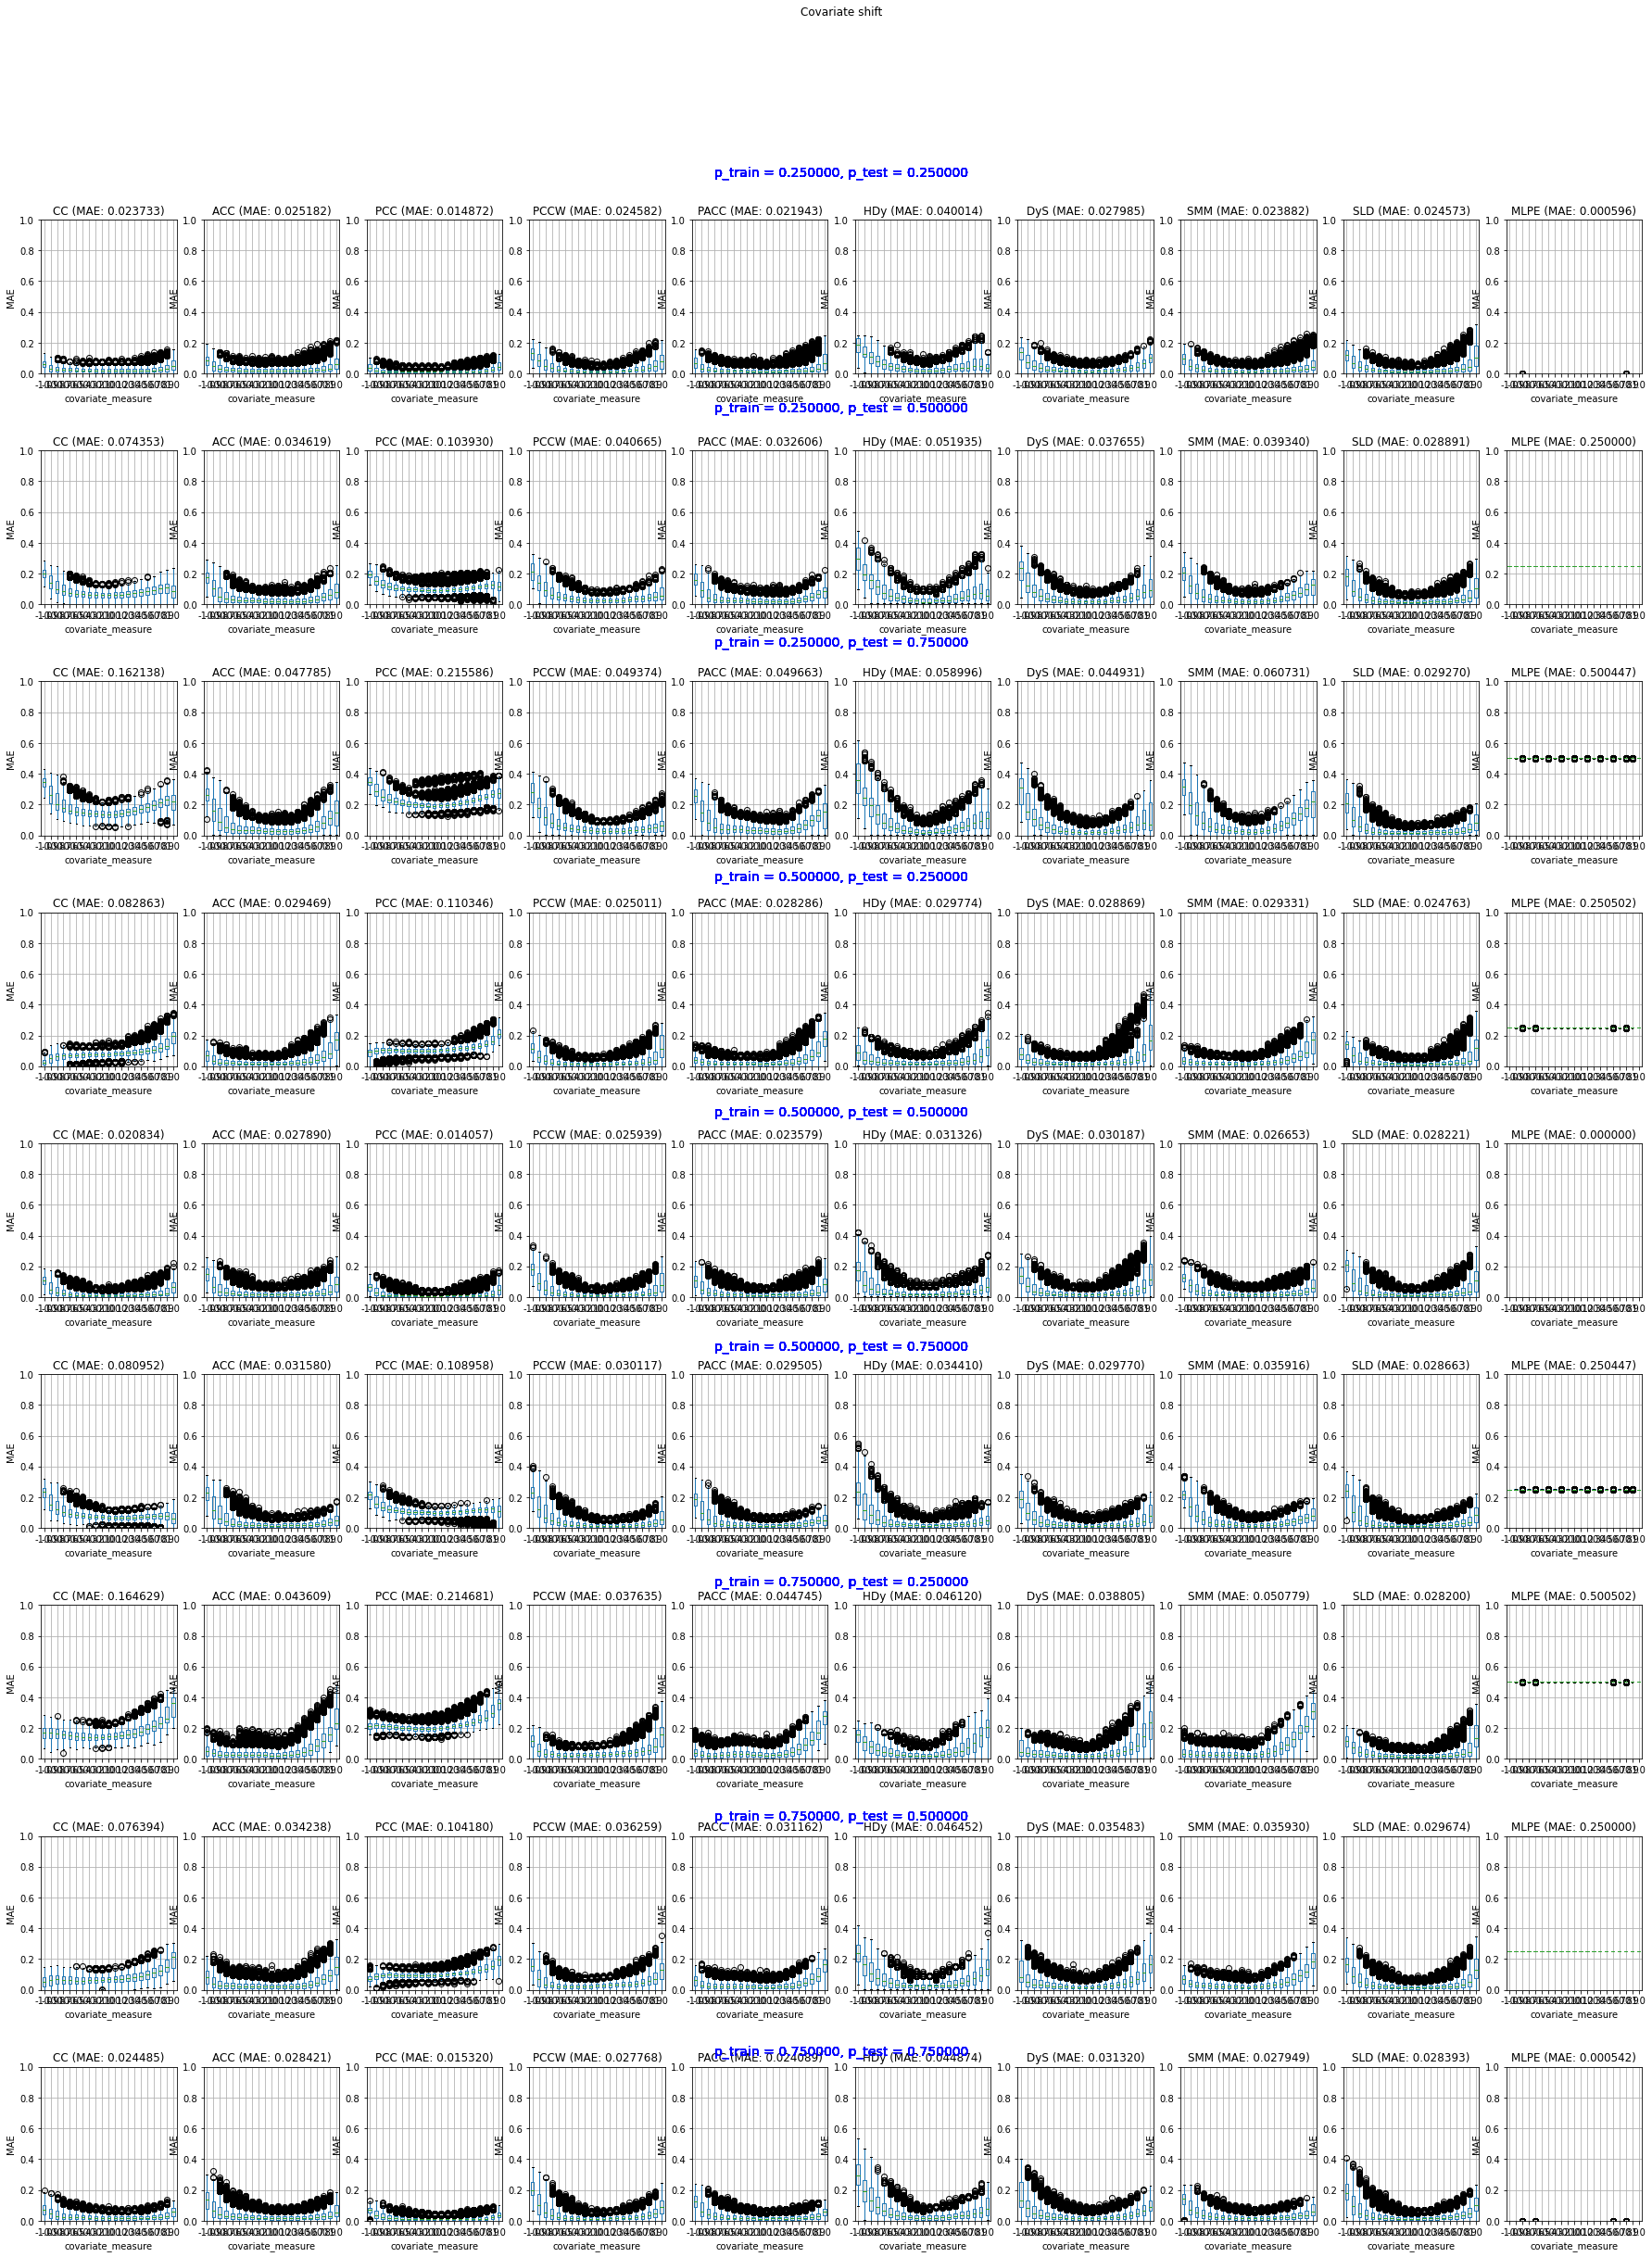

In [2]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(len(ps_test)*len(ps_train),len(quantificators),figsize=(30,40))
plt.subplots_adjust(hspace=0.5)
for i, p_train in enumerate(ps_train):
    for j, p_test in enumerate(ps_test):
        for k,quant_name in enumerate(quantificators):
            exp_id = "%s_%f_%f" % (quant_name, p_train, p_test)
            row = i*len(ps_train)+j
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            ax[row][k].set_ylim(0, 1)
            ax[row][k].set_ylabel(error)
            ax[row][k].xaxis.set_major_locator(ticker.MultipleLocator(3))
            results.boxplot(ax=ax[row][k],column='error',by='covariate_measure')
            plt.suptitle('Covariate shift')
            ax[row][k].set_title("%s (%s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))
            plt.figtext(0.5,0.92-((i*len(ps_train)+j)*0.088), "p_train = %f, p_test = %f" % (p_train,p_test), ha="center", va="top", fontsize=14, color="b")


### Tables and charts to be included in a paper

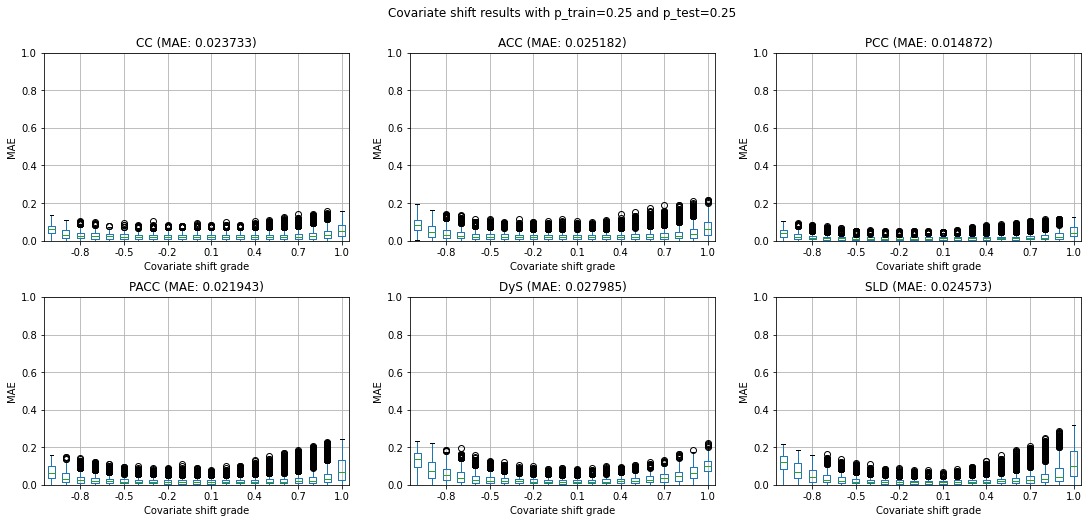

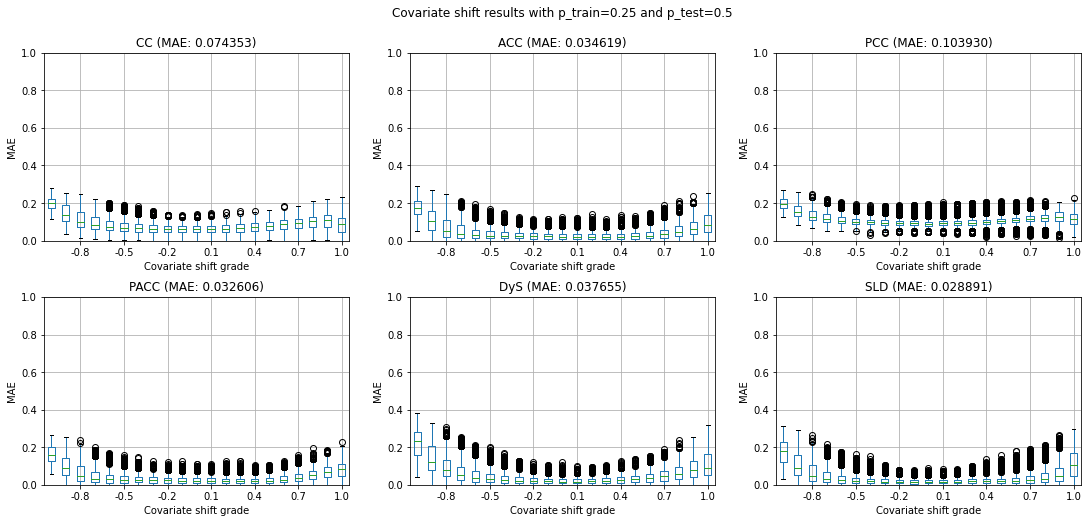

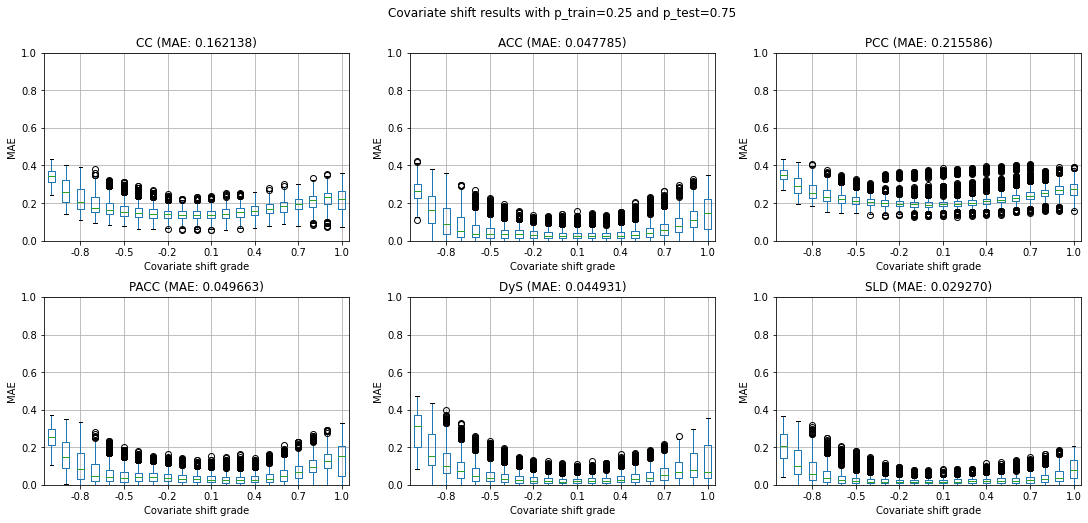

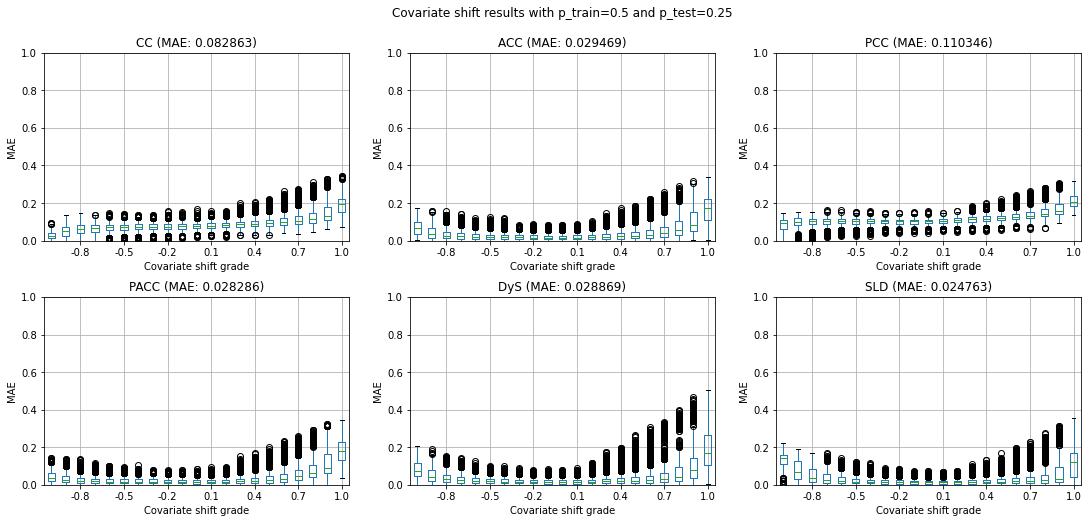

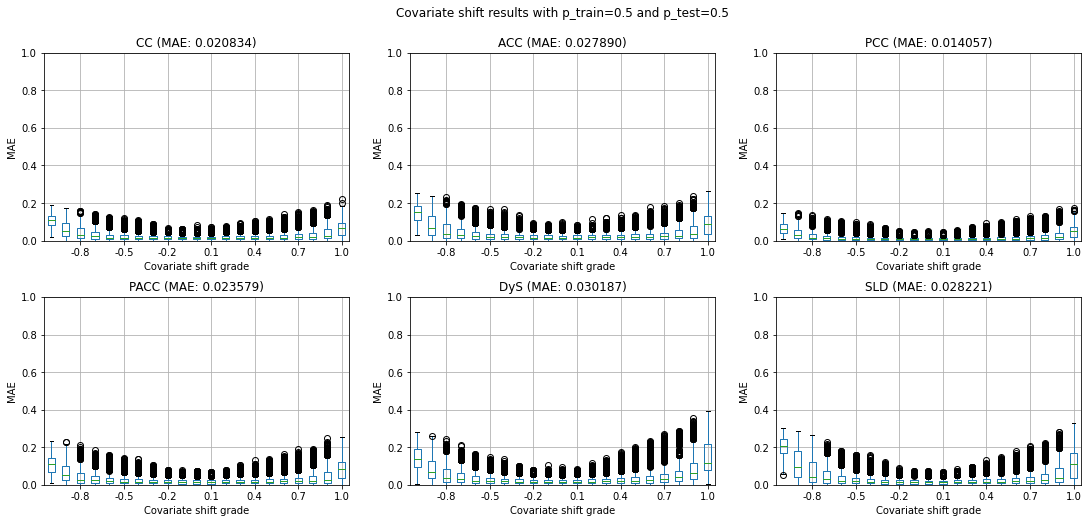

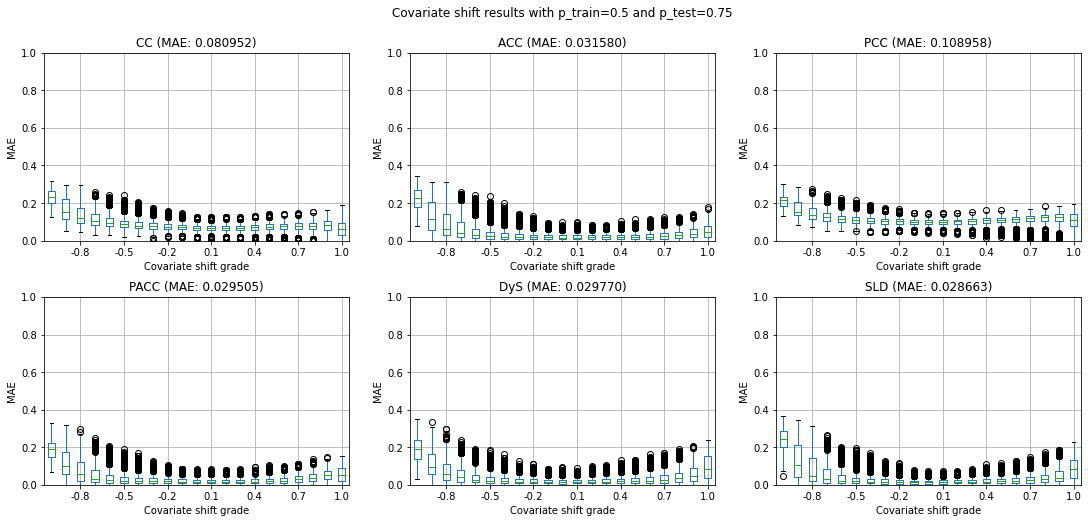

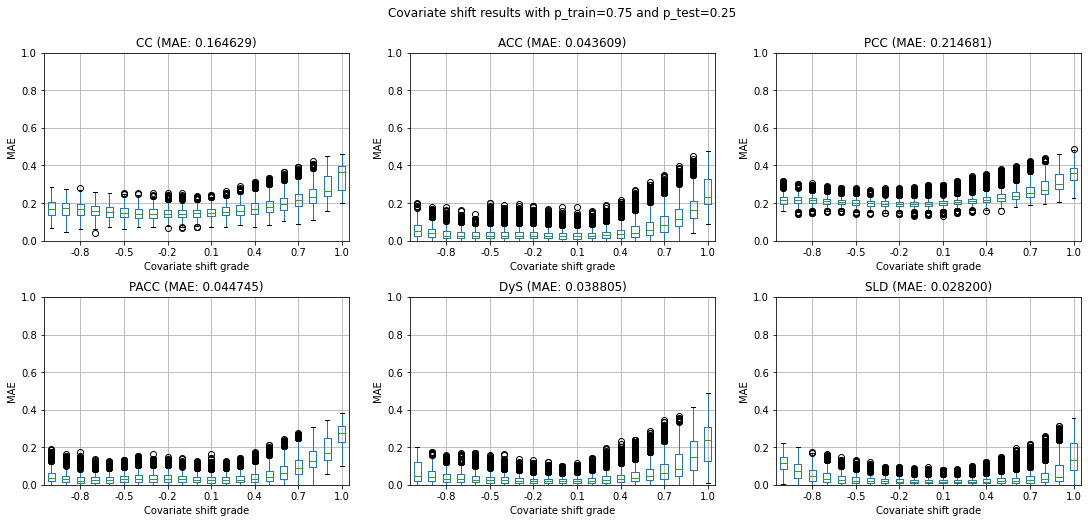

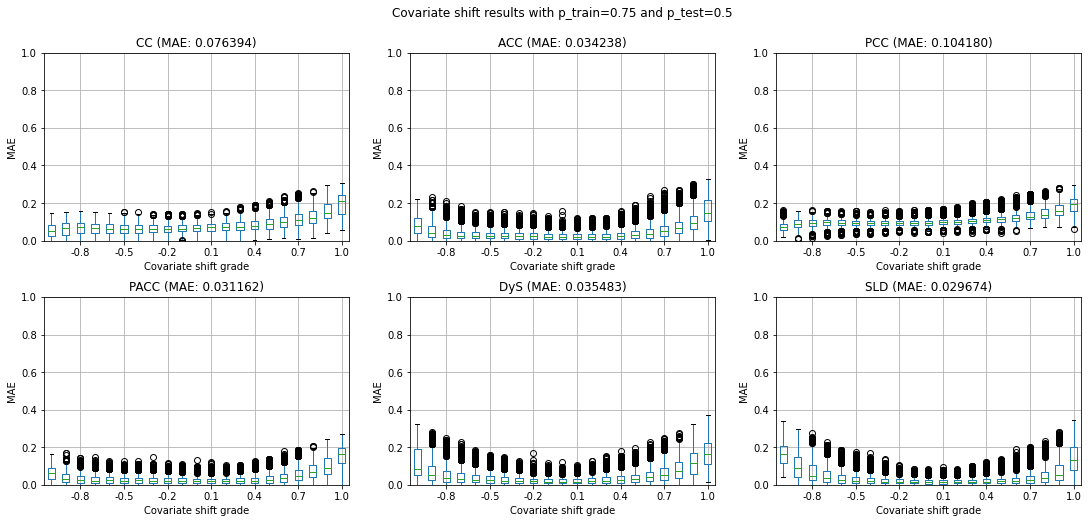

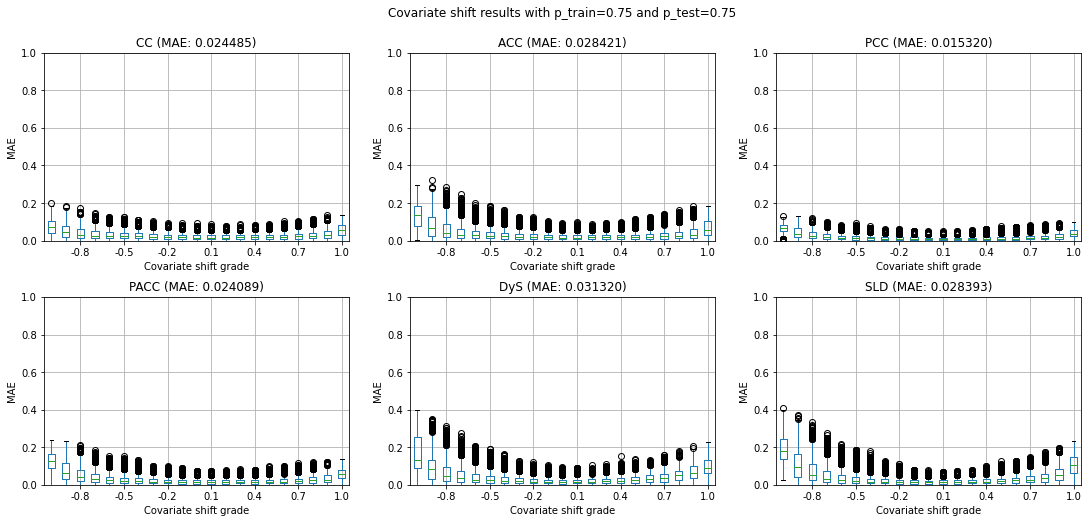

In [3]:
quantificators = ["CC", "ACC", "PCC", "PACC", "DyS", "SLD"]

n_cols=3
for p_train in ps_train:
    for p_test in ps_test:
        fig, ax = plt.subplots(2,n_cols,figsize=(18,8))
        plt.subplots_adjust(hspace=0.3)
        for k,quant_name in enumerate(quantificators):
            exp_id = "%s_%f_%f" % (quant_name, p_train, p_test)
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            ax[k//n_cols][k%n_cols].set_ylim(0, 1)
            ax[k//n_cols][k%n_cols].set_ylabel(error)
            results.boxplot(ax=ax[k//n_cols][k%n_cols],column='error',by='covariate_measure')
            ax[k//n_cols][k%n_cols].set_xlabel("Covariate shift grade")
            ax[k//n_cols][k%n_cols].xaxis.set_major_locator(ticker.MultipleLocator(3))
            plt.suptitle('Covariate shift results with p_train={} and p_test={}'.format(p_train, p_test))
            ax[k//n_cols][k%n_cols].set_title("%s (%s: %f)"  % (quant_name,error,mean_error_methods[exp_id]))
        #plt.savefig(os.path.join(export_dir,"images/covariateresults{}_{}.pdf".format(p_train, p_test)),format='pdf')
        #plt.savefig(os.path.join(export_dir,"images/covariateresults{}_{}.png".format(p_train, p_test)),format='png')


## Shorter version of charts

Put a chart only with PCC and SLD which are a representation of methods for covariate

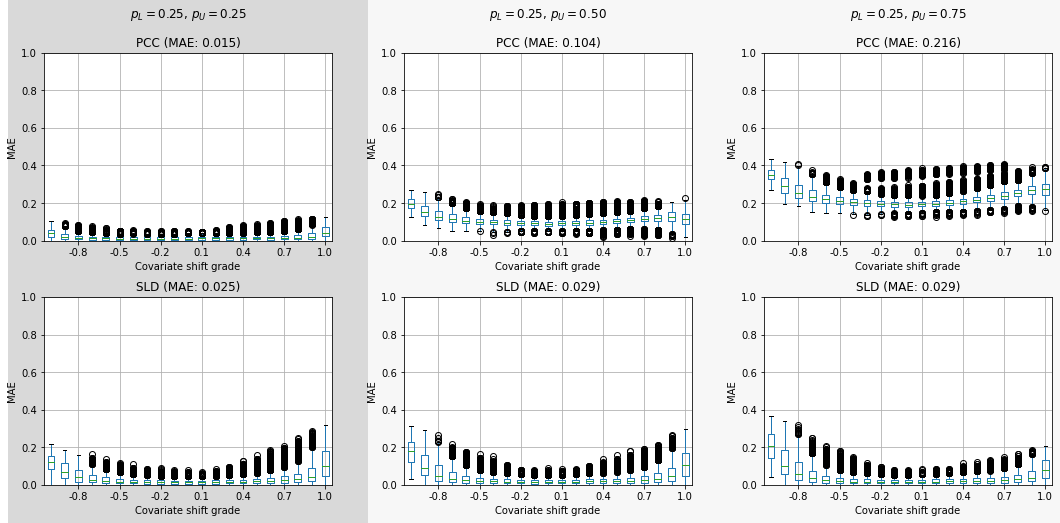

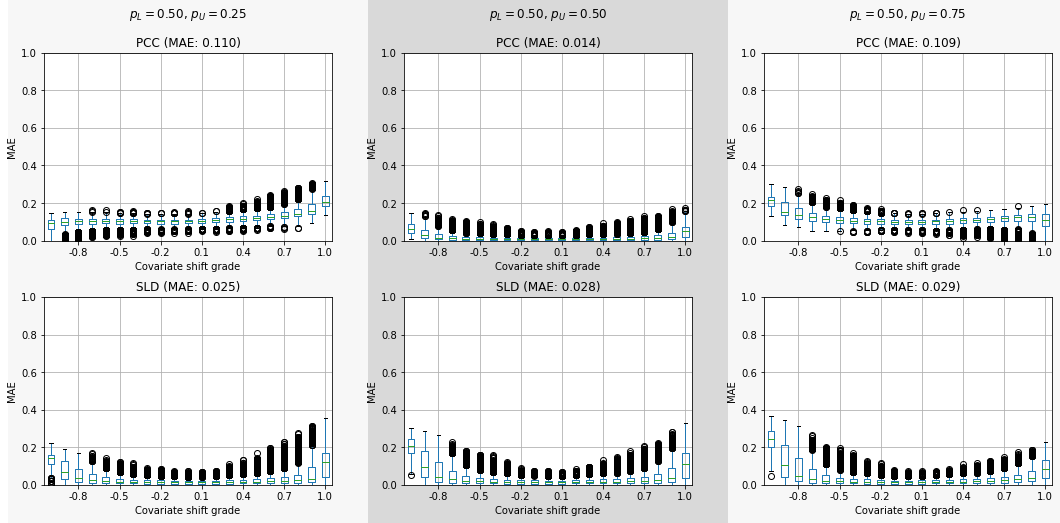

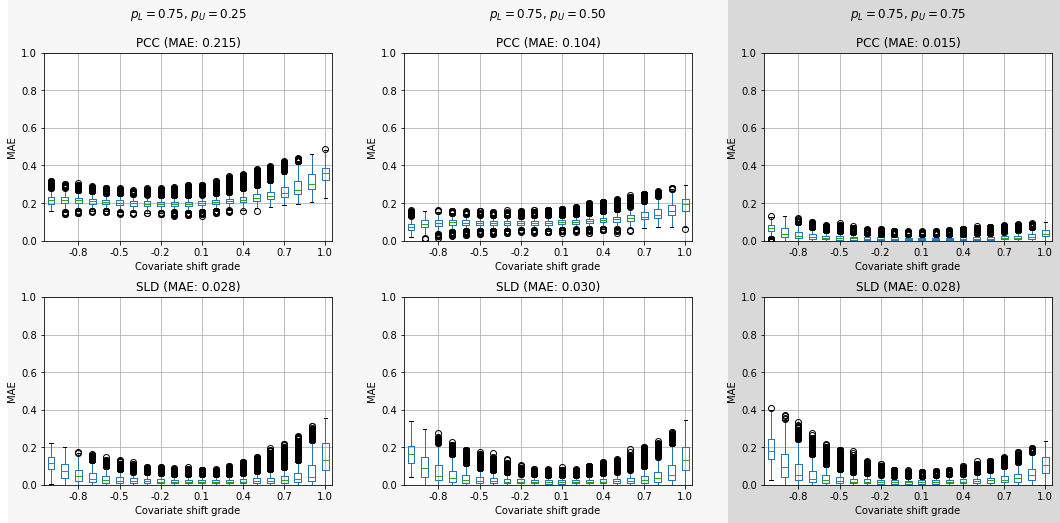

In [4]:
quantificators = ["PCC","SLD"]
for i, p_train in enumerate(ps_train):
    fig = plt.figure(figsize=(15,8))
    subfigs = fig.subfigures(ncols=3,wspace=2)
    plt.subplots_adjust(hspace=0.3)
    
    for j, p_test in enumerate(ps_test):
        axs = subfigs[j].subplots(nrows=2)
        for k,quant_name in enumerate(quantificators):
            exp_id = "%s_%f_%f" % (quant_name,p_train,p_test)
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            axs[k].set_ylim(0, 1)
            axs[k].set_ylabel(error)
            results.boxplot(ax=axs[k],column='error',by='covariate_measure')
            axs[k].xaxis.set_major_locator(ticker.MultipleLocator(3))
            axs[k].set_xlabel("Covariate shift grade")
            axs[k].set_title("%s (%s: %.3f)"  % (quant_name,error,mean_error_methods[exp_id]))
        subfigs[j].suptitle('$p_{L}=%.2f$, $p_{U}=%.2f$' % (p_train,p_test))
        if p_train==p_test:
            subfigs[j].set_facecolor('0.85')
        else:
            subfigs[j].set_facecolor('0.97')

    plt.savefig(os.path.join(export_dir,"images/covariatesummary_{}.pdf".format(p_train)),format='pdf')
    plt.savefig(os.path.join(export_dir,"images/covariatesummary_{}.png".format(p_train)),format='png')

## Main tables for covariate shift in the paper

This will generate three tables for covariate shift. It is meant to be in the main paper.

In [5]:
from utils.wilcoxon import wilcoxon_test

quantificators = ["CC", "ACC", "PCC", "PACC", "DyS", "SLD"]
global_results = {}
for i, p_train in enumerate(ps_train):
    columns = pd.MultiIndex.from_product([["p_test={}".format(p_test) for p_test in ps_test],quantificators])
    global_results[p_train] = pd.DataFrame(columns = columns,index=np.linspace(-1,1,21).round(1))
    for i, p_test in enumerate(ps_test):
        for k,quant_name in enumerate(quantificators):
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            results = results.groupby(by='covariate_measure')['error'].mean()
            global_results[p_train].loc[:, (["p_test={}".format(p_test)], [quant_name])] = results

global_results_style = {}
for p_train in ps_train:
    global_results_style[p_train] = global_results[p_train].style.format('{:.3f}').format_index('{:.1f}')

for p_train in ps_train:
    for p_test in ps_test:
        #We want to make a statistical test for each row, to compare methods for the same degree of covariate shift
        for i,r in global_results[p_train].loc[:, (["p_test={}".format(p_test)])].iterrows():
            #compute the best method for this experiment
            covariate_measure = r.name
            best = r.index[r.argmin()]
            p_test = float(best[0][7:])
            best_method = best[1]
            #print("Computing statistical test for experiment covariate degree=%f, p_test=%s. Winner method %s" % (covariate_measure,p_test,best_method))
            #Get data for the winner method
            results_best = results_dict[best_method].loc[(results_dict[best_method]['p_test']==p_test) & (results_dict[best_method]['p_train']==p_train) & (results_dict[best_method]['covariate_measure']==covariate_measure),'error'].to_numpy()
            #We need to get all the rows in results that matches this experiment for each method
            for quant_name in quantificators:
                if quant_name!=best_method:
                    results_method = results_dict[quant_name].loc[(results_dict[quant_name]['p_test']==p_test) & (results_dict[best_method]['p_train']==p_train) & (results_dict[quant_name]['covariate_measure']==covariate_measure),'error'].to_numpy()
                    global_results_style[p_train] = global_results_style[p_train].set_properties(subset=(covariate_measure, (best[0],quant_name)),**wilcoxon_test(results_best,results_method))
                    

for p_train in ps_train:
    columns = 'r'*len(quantificators)
    for p_test in ps_test:
        global_results_style[p_train] = global_results_style[p_train].highlight_min(axis=1,props='textbf:--rwrap;',subset=(["p_test={}".format(p_test)]))
        if p_test == p_train:
            global_results_style[p_train] = global_results_style[p_train].set_properties(cellcolor="{verylightgray}", subset=(["p_test={}".format(p_test)]))
    latex_code = global_results_style[p_train].to_latex(hrules=True,multicol_align='c',column_format='l|'+columns+'|'+columns+'|'+columns)
    latex_code = latex_code.replace(' 0.',' .').replace('{0.','{.')
    for p_test in ps_test:
        latex_code = latex_code.replace("p_test=%g" % p_test,"$p_{U}=%g$" % p_test)
    with open(os.path.join(export_dir,'tables/covariate_table_{}.tex'.format(p_train)), 'w') as f:
        f.write(latex_code)


## PCCW results

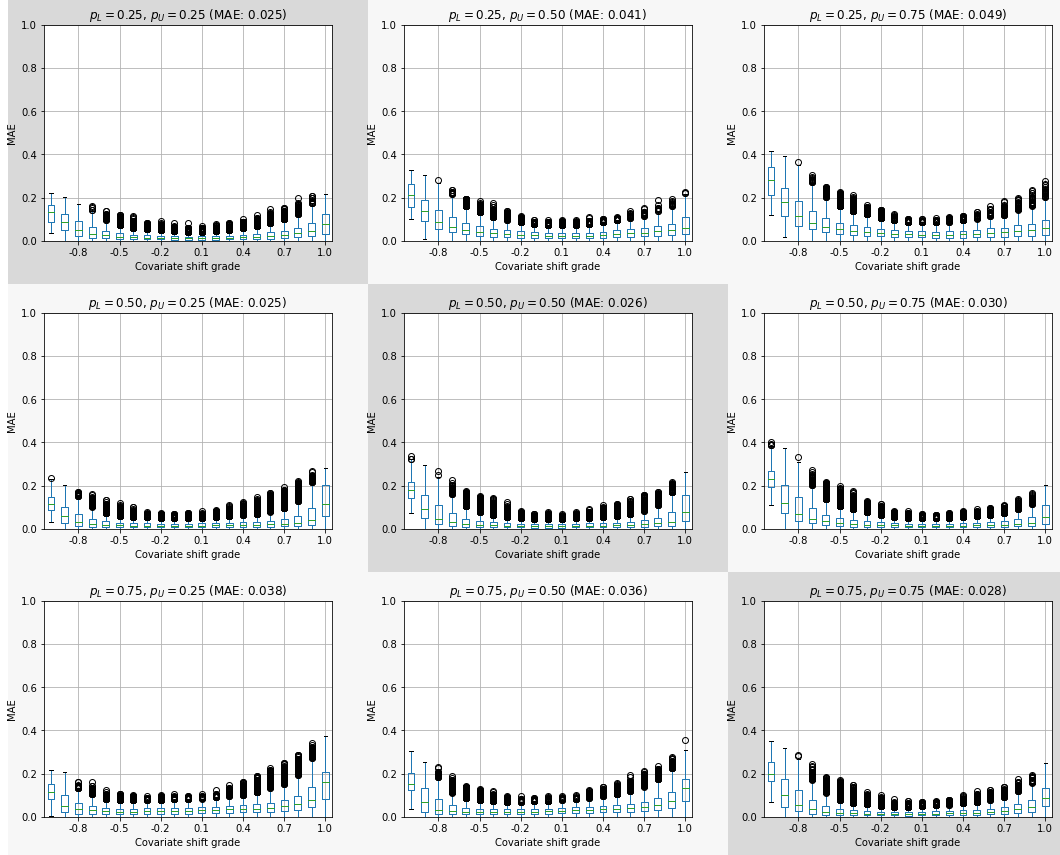

In [6]:
fig = plt.figure(figsize=(15,12))
subfigs = fig.subfigures(ncols=len(ps_train),nrows=len(ps_test))
#fig, ax = plt.subplots(len(ps_train),len(ps_test),figsize=(15,12))
#fig.subplots_adjust(left=0, bottom=0, right=1, top=1,hspace=0.4)
for i, p_train in enumerate(ps_train):
    for j, p_test in enumerate(ps_test): 
        quant_name="PCCW"
        exp_id = "%s_%f_%f" % (quant_name,p_train,p_test)
        results = results_dict[quant_name]
        results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
        ax = subfigs[i][j].subplots()
        ax.set_ylim(0, 1)
        ax.set_ylabel(error)
        results.boxplot(ax=ax,column='error',by='covariate_measure')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
        ax.set_xlabel("Covariate shift grade")
        ax.set_title(r'$p_{L}=%.2f$, $p_{U}=%.2f$ (%s: %.3f)'  % (p_train,p_test,error,mean_error_methods[exp_id]))
        if p_train==p_test:
            subfigs[i][j].set_facecolor('0.85')
        else:
            subfigs[i][j].set_facecolor('0.97')
        subfigs[i][j].suptitle('')
plt.suptitle('')
plt.savefig(os.path.join(export_dir,"images/covariate_pccw.pdf"),bbox_inches='tight',format='pdf')
plt.savefig(os.path.join(export_dir,"images/covariate_pccw.png"),bbox_inches='tight',format='png')

## Tables to latex

All the tables for the suplemental material.

In [7]:
quantificators = ["CC", "ACC", "PCC", "PACC","DyS", "SLD"]
mean_error_methods = {}
for p_train in ps_train:
    for p_test in ps_test:
        for quant_name in quantificators:
            exp_id = "%s_%f_%f" % (quant_name,p_train,p_test)
            results = results_dict[quant_name]
            results = results.loc[(results['p_test'] == p_test) & (results['p_train'] == p_train)]
            results_mean = results.groupby(['domainA_prop_train', 'domainA_prop_test'])['error'].mean().reset_index()
            #convert to matrix form
            results_mean = results_mean.pivot(index='domainA_prop_train', columns='domainA_prop_test', values='error')
            results_mean.columns.name=None
            results_mean.index.name=None
            results_mean.columns = results_mean.columns.map(lambda x: "%.1f" % float(x))
            mean_error_methods[exp_id]=results_mean.mean().mean()
            cm = sns.light_palette('red', as_cmap=True)
            f = open("tables/covariate/results_%s_%s_%s.tex" % (quant_name,p_train,p_test), "w")
            label_name = "tab:covariate%s%.1f%.1f" % (quant_name,p_train,p_test)
            label_name = label_name.replace(".","")
            f.write(results_mean.style.format_index('{:.1f}').format('{:.3f}').background_gradient(cmap=cm,low=0,high=1).to_latex(convert_css=True,
                                    caption="Results for \emph{covariate shift} for method %s. In rows, \emph{covariate shift} grade for training set, in columns, \emph{covariate shift} grade for test sample. p_test: %f. Mean %s: %f." % (quant_name,p_test,error,mean_error_methods[exp_id]),
                                    column_format='lccccccccccc', position='H',label=label_name))
            f.close()